In [3]:
%pylab inline
import numpy as np 
import matplotlib.pyplot as plt
import sys
import os
import glob
import astropy.table
import pandas as pd
plt.rc('font', size=14, family='serif')

Populating the interactive namespace from numpy and matplotlib


In [40]:
sys.path.insert(0,'/Users/parkerf/Research/SkyModel/BOSS_Sky/SkyModel/ContModel/python/')

In [41]:
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import cont_model as Model

In [5]:
#SMeta = astropy.table.Table.read('/Volumes/PFagrelius_Backup/sky_data/wave_data/sorted_good_mean_meta_071718.fits')
Meta = astropy.table.Table.read('/Users/parkerf/Research/SkyModel/BOSS_Sky/good_mean_meta_071718.fits')

In [6]:
blue_wave_files  = glob.glob('/Volumes/PFagrelius_Backup/sky_data/wave_arrays/blue*.npy')
red_wave_files  = glob.glob('/Volumes/PFagrelius_Backup/sky_data/wave_arrays/red*.npy')

In [8]:
BSMeta = astropy.table.Table.read('/Volumes/PFagrelius_Backup/sky_data/wave_arrays/blue_sorted_good_mean_meta_071726.fits')
RSMeta = astropy.table.Table.read('/Volumes/PFagrelius_Backup/sky_data/wave_arrays/red_sorted_good_mean_meta_071726.fits')

In [1]:
ResultsD = []
ResultsT = []
ResultsM = []
#ResultsF = []
for item in ['cont_b_380','cont_b_410','cont_b_425','cont_b_460','cont_b_480','cont_b_510','cont_b_565','cont_b_540','cont_b_615','cont_b_583']:
    yy = BSMeta[item]
    wl = int(item[-3:])
    TM = Model.ContModel(yy, wl, 'blue', BSMeta)
    TM.run_dark_model()
    ResultsD.append(TM.get_params())
    TM.run_twi_model()
    ResultsT.append(TM.get_params()) 
    TM.run_moon_model()
    ResultsM.append(TM.get_params())
    #TM.run_full_model()
    #ResultsF.append(TM.get_params()) 
for item in ['cont_b_833','cont_b_720','cont_b_740','cont_b_710','cont_b_675','cont_b_977','cont_b_642','cont_b_873','cont_b_920','cont_b_825']:
    yy = RSMeta[item]
    wl = int(item[-3:])
    TM = Model.ContModel(yy, wl, 'red', RSMeta)
    TM.run_dark_model()
    ResultsD.append(TM.get_params())
    TM.run_twi_model()
    ResultsT.append(TM.get_params())
    TM.run_moon_model()
    ResultsM.append(TM.get_params())
    #TM.run_full_model()
    #ResultsF.append(TM.get_params()) 
ResultsD = pd.concat(ResultsD)
ResultsT = pd.concat(ResultsT)
ResultsM = pd.concat(ResultsM)
#ResultsF = pd.concat(ResultsF)

NameError: name 'BSMeta' is not defined

In [ ]:
#Need to use sorted meta if using wavelength data
DarkResults = []
TwiResults = []
MoonResults = []
#FullResults = []
for wave in blue_wave_files:
    wl = os.path.splitext(wave)[0][-3:]
    if float(wl) in np.linspace(360,620,(621-360)):
        yy = np.load(wave)
        TM = Model.ContModel(yy, wl, 'blue', BSMeta)
        try:
            TM.run_dark_model()
            DarkResults.append(TM.get_params())
            TM.run_twi_model()
            TwiResults.append(TM.get_params())
            TM.run_moon_model()
            MoonResults.append(TM.get_params())
            #TM.run_full_model()
            #FullResults.append(TM.get_params())
        except:
            print(wl)
for wave in red_wave_files:
    wl = os.path.splitext(wave)[0][-3:]
    if float(wl) in np.linspace(621,1030,(1031-621)):
        yy = np.load(wave)
        TM = Model.ContModel(yy, wl, 'red', RSMeta)
        try:
            TM.run_dark_model()
            DarkResults.append(TM.get_params())
            TM.run_twi_model()
            TwiResults.append(TM.get_params())
            TM.run_moon_model()
            MoonResults.append(TM.get_params())
            #TM.run_full_model()
            #FullResults.append(TM.get_params())
        except:
            print(wl)
DarkResults = pd.concat(DarkResults)
TwiResults = pd.concat(TwiResults)
MoonResults = pd.concat(Results)
#FullResults = pd.concat(Results)

In [18]:
import multiprocessing
blue_wave_files  = glob.glob('/Volumes/PFagrelius_Backup/sky_data/wave_arrays/blue*.npy')
BSMeta = astropy.table.Table.read('/Volumes/PFagrelius_Backup/sky_data/wave_arrays/blue_sorted_good_mean_meta_071726.fits')

In [61]:
pool = multiprocessing.Pool(processes=4)
bret = pool.map(make_blue_model_for_wave, blue_wave_files)
pool.terminate()

455
413
371
360
456
361
372
414
415
362
373
457
416
374
363
458
417
375
364
459
418
376
365
460
377
419
366
461
378
420
367
462
421
379
368
463
380
422
369
464
381
370
423
465
382
497
424
466
383
425
498
467
384
426
499
468
385
427
500
469
386
428
501
470
429
387
471
502
430
388
472
503
389
431
473
504
432
390
474
505
433
391
475
506
434
392
476
507
435
393
477
508
436
394
478
509
437
395
479
510
438
396
480
439
511
397
481
440
512
398
482
441
513
399
483
442
514
400
484
443
515
401
485
444
402
516
486
445
403
517
487
446
404
518
488
447
405
519
489
448
406
520
490
449
407
521
450
491
408
522
451
492
409
523
452
493
410
524
453
494
411
525
454
412
495
526
539
581
496
527
540
582
528
541
583
529
584
542
530
585
543
531
586
544
587
532
545
588
533
546
589
534
547
590
535
548
591
536
549
592
537
550
593
538
551
594
552
595
553
596
554
597
555
598
556
599
557
600
558
601
559
602
560
603
561
604
562
605
563
606
564
607
565
608
566
609
567
568
610
569
611
612
570
613
571
572
614
573
615
574


In [85]:
Bret = []
for i in bret:
    if i is None:
        pass
    else:
        Bret.append(i)

In [86]:
BlueResults = np.vstack(Bret)

In [75]:
BlueResults = pd.DataFrame(BlueResults)

In [78]:
BlueResults.columns = ['wl','model','data_var','unexplained_var','X2','rX2','c0','c_am','tau','tau2','c_zodi','c_isl','sol','I',
        't0','t1','t2','t3','t4','m0','m1','m2','m3','m4','m5','m6','feb','mar','apr','may','jun','jul','aug','sep','oct','nov',
        'dec','c2','c3','c4','c5','c6']
BlueResults.to_csv('BMoonResults.csv', sep=',')

In [60]:
def make_blue_model_for_wave(wave_file):
    wl = os.path.splitext(wave_file)[0][-3:]

    if float(wl) in np.linspace(360,620,(621-360)):
        print(wl)
        yy = np.load(wave_file)
        TM = Model.ContModel(yy, wl, 'blue', BSMeta)
        
        try:
            TM.run_dark_model()
            TM.run_twi_model()
            TM.run_moon_model()
            Results = TM.get_params()
            return Results
        except:
            print("%d didn't work"%int(wl))

In [82]:
def make_red_model_for_wave(wave_file):
    wl = os.path.splitext(wave_file)[0][-3:]

    if float(wl) in np.linspace(621,1030,(1031-621)):
        print(wl)
        yy = np.load(wave_file)
        TM = Model.ContModel(yy, wl, 'red', RSMeta)

        try:
            TM.run_dark_model()
            TM.run_twi_model()
            TM.run_moon_model()
            Results = TM.get_params()
            return Results
        except:
            print("%d didn't work"%int(wl))

In [83]:
pool = multiprocessing.Pool(processes=4)
rret = pool.map(make_red_model_for_wave, red_wave_files)
pool.terminate()

665
621
623
707
622
624
708
666
749
625
667
709
626
750
668
710
627
751
669
711
628
752
670
712
629
753
671
713
630
754
672
714
631
755
673
715
632
756
674
716
633
757
717
675
634
758
718
676
635
759
719
677
636
760
720
678
637
761
721
679
638
762
722
680
639
763
723
681
640
764
724
682
641
765
725
642
683
766
726
684
643
767
727
685
644
768
728
645
686
769
729
687
646
770
730
688
647
771
731
689
648
772
732
649
690
773
733
691
650
774
734
692
651
775
735
693
652
736
776
694
737
653
777
695
738
654
778
696
739
655
779
697
740
656
780
698
741
657
781
699
742
658
782
700
743
659
783
701
744
660
784
745
702
661
785
746
703
662
786
747
704
787
663
748
705
664
788
791
706
833
789
792
875
834
790
793
876
835
917
794
877
836
918
795
878
837
919
796
879
838
920
797
880
839
921
798
840
881
922
799
841
882
923
800
842
883
924
801
843
884
925
802
844
885
926
803
845
886
927
804
846
887
928
805
847
888
929
806
848
889
930
807
849
890
931
808
850
891
932
809
851
892
933
810
852
893
934
811
853
894


In [84]:
Rret = []
for i in rret:
    if i is None:
        pass
    else:
        Rret.append(i)

In [87]:
RedResults = np.vstack(Rret)

In [88]:
Results = np.vstack([BlueResults, RedResults])

In [108]:
Results = pd.DataFrame(Results)
Results.columns = ['wl','model','data_var','unexplained_var','X2','rX2','c0','c_am','tau','tau2','c_zodi','c_isl','sol','I',
        't0','t1','t2','t3','t4','m0','m1','m2','m3','m4','m5','m6','feb','mar','apr','may','jun','jul','aug','sep','oct','nov',
        'dec','c2','c3','c4','c5','c6']
Results.to_csv('Results.csv', sep=',')

In [6]:
Results = pd.DataFrame.from_csv('/Users/parkerf/Research/SkyModel/BOSS_Sky/SkyModel/ContModel/python/MoonResults.csv')
Results.columns = ['wl','model','data_var','unexplained_var','X2','rX2','c0','c_am','tau','tau2','c_zodi','c_isl','sol','I',
        't0','t1','t2','t3','t4','m0','m1','m2','m3','m4','m5','m6','feb','mar','apr','may','jun','jul','aug','sep','oct','nov',
        'dec','c2','c3','c4','c5','c6']

In [7]:
CloudyResults = pd.DataFrame.from_csv('/Users/parkerf/Research/SkyModel/BOSS_Sky/SkyModel/ContModel/python/MoonResultsCloudy.csv')
CloudyResults.columns = ['wl','model','data_var','unexplained_var','X2','rX2','c0','c_am','tau','tau2','c_zodi','c_isl','sol','I',
        't0','t1','t2','t3','t4','m0','m1','m2','m3','m4','m5','m6','feb','mar','apr','may','jun','jul','aug','sep','oct','nov',
        'dec','c2','c3','c4','c5','c6']

In [8]:
DarkResults = Results[Results['model']=='dark']
TwiResults = Results[Results['model']=='twilight']
MoonResults = Results[Results['model']=='moon']

In [9]:
CloudyDarkResults = CloudyResults[CloudyResults['model']=='dark']
CloudyTwiResults = CloudyResults[CloudyResults['model']=='twilight']
CloudyMoonResults = CloudyResults[CloudyResults['model']=='moon']

In [10]:
np.unique(Results['model'])

array(['dark', 'moon', 'twilight'], dtype=object)

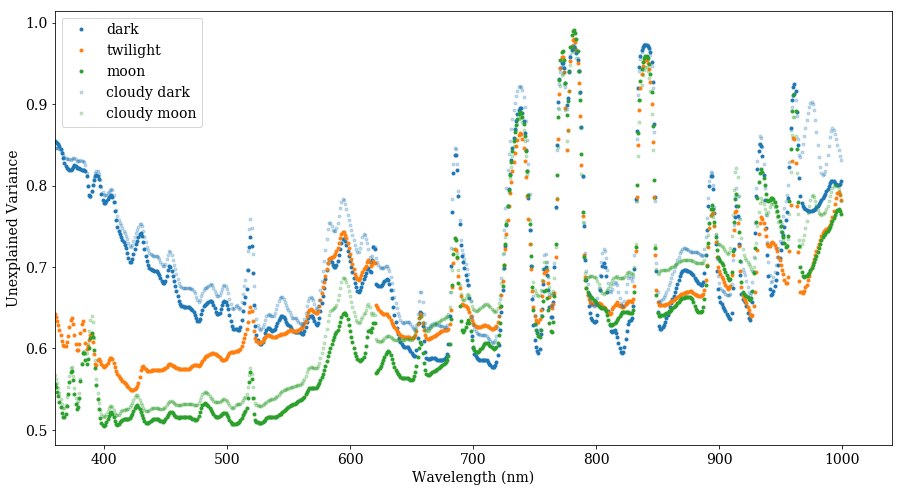

In [11]:
plt.figure(figsize=(15,8))
plt.plot(DarkResults['wl'], DarkResults['unexplained_var']/DarkResults['data_var'],'.',color = 'C0',label = 'dark')
plt.plot(TwiResults['wl'], TwiResults['unexplained_var']/TwiResults['data_var'],'.',color = 'C1', label = 'twilight')
plt.plot(MoonResults['wl'], MoonResults['unexplained_var']/MoonResults['data_var'], '.', color = 'C2', label = 'moon')

plt.plot(CloudyDarkResults['wl'], CloudyDarkResults['unexplained_var']/CloudyDarkResults['data_var'],'.',color = 'C0', alpha = 0.25,label = 'cloudy dark')
plt.plot(CloudyMoonResults['wl'], CloudyMoonResults['unexplained_var']/CloudyMoonResults['data_var'],'.',color = 'C2', alpha = 0.25,label = 'cloudy moon')

# plt.plot(ResultsD['wl'], ResultsD['unexplained_var']/ResultsD['data_var'],'x',label = 'dark')
# plt.plot(ResultsT['wl'], ResultsT['unexplained_var']/ResultsT['data_var'],'x',label = 'twilight')
# plt.plot(ResultsM['wl'], ResultsM['unexplained_var']/ResultsM['data_var'], 'x',label = 'moon')
#plt.plot(ResultsF['wl'], ResultsF['unexplained_var']/ResultsF['data_var'],'x',label = 'with clouds')
plt.legend()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Unexplained Variance")
#plt.ylim(0,1)
plt.xlim(360,1040)
plt.savefig('/Users/parkerf/Research/Thesis/thesis_doc/images/unexp_var_dark.png')

0.05510390199141606
0.17786712666075816


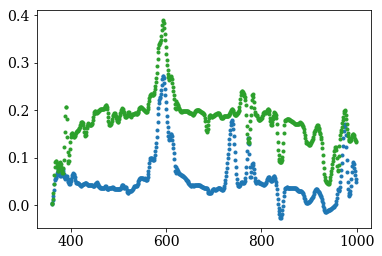

In [168]:
plt.plot(DarkResults['wl'], CloudyDarkResults['data_var']-DarkResults['data_var'],'.',color = 'C0',label = 'dark')
plt.plot(DarkResults['wl'], CloudyMoonResults['data_var']-MoonResults['data_var'],'.',color = 'C2',label = 'moon')
print(np.mean(CloudyDarkResults['data_var']-DarkResults['data_var']))
print(np.mean(CloudyMoonResults['data_var']-MoonResults['data_var']))

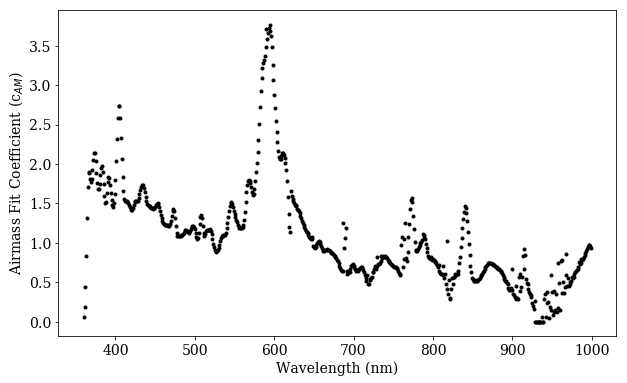

In [146]:
plt.figure(figsize=(10,6))
plt.plot(MoonResults['wl'], MoonResults['c_am'],'k.')
#plt.plot(ResultsD['wl'], ResultsD['c_am']*(ResultsD['tau']),'rx')
#plt.xlim(360,630)
#plt.ylim(0,20)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Airmass Fit Coefficient (c$_{AM}$)")

plt.savefig('/Users/parkerf/Research/Thesis/thesis_doc/images/c_am.png')

In [96]:
from scipy.interpolate import interp1d
zen_ext = np.loadtxt('/Users/parkerf/Research/SkyModel/BOSS_Sky/SkyModel/files/ZenithExtinction-KPNO.dat')
zen_wave = zen_ext[:,0]/10.
ext = zen_ext[:,1]
zext = interp1d(zen_wave, ext, bounds_error=False, fill_value = 'extrapolate')


def add_ext(airmass,tau, wl):
    k = zext(wl)
    tput = 1 - (10**(-0.4*k*tau) - 10**(-0.4*k*airmass*tau))
    return tput

In [97]:
WW = np.array(DarkResults['wl'])
TT = np.array(DarkResults['tau'])

In [107]:
sort = np.argsort(WW)

In [105]:
new_ext1 = add_ext(1, np.ones(len(WW)), WW[sort])
new_ext14 = add_ext(1.4,TT[sort], WW[sort])

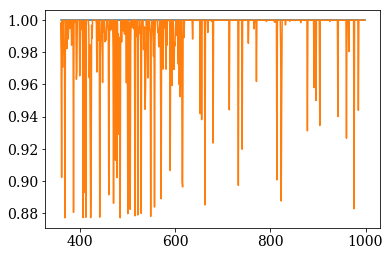

In [108]:
plt.plot(WW[sort], new_ext1, '-',label = 'airmass 1')
plt.plot(WW[sort], new_ext14, '-',label = 'airmass 1.4')

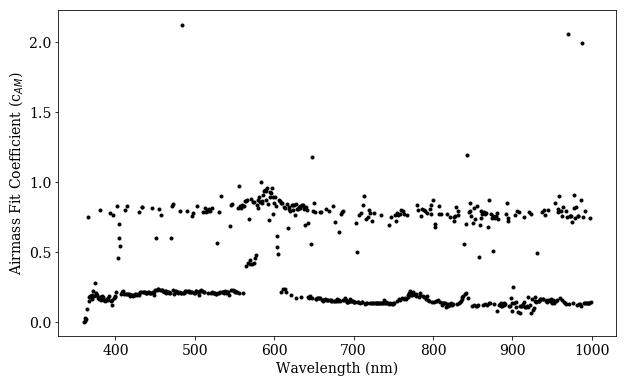

In [120]:
plt.figure(figsize=(10,6))
plt.plot(DarkResults['wl'], DarkResults['tau'],'k.')
#plt.plot(ResultsD['wl'], ResultsD['c_am']*(ResultsD['tau']),'rx')
#plt.xlim(360,630)
#plt.ylim(0.8,2)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Airmass Fit Coefficient (c$_{AM}$)")

## Zodi

In [122]:
from scipy import interpolate

In [123]:
wave_range = np.linspace(360,1040,(1040-360))
sun_s = np.loadtxt('/Users/parkerf/Research/SkyModel/BOSS_Sky/SkyModel/files/solarspec.txt')
sun_s = interpolate.interp1d(sun_s[:,1], sun_s[:,2], bounds_error = False, fill_value=0)
solar_spectrum = sun_s(wave_range*10)

In [124]:
nm_500 = [np.abs(500.-w) for w in wave_range]
nm_id = np.argmin(nm_500)
zodi_abs = solar_spectrum/solar_spectrum[nm_id]

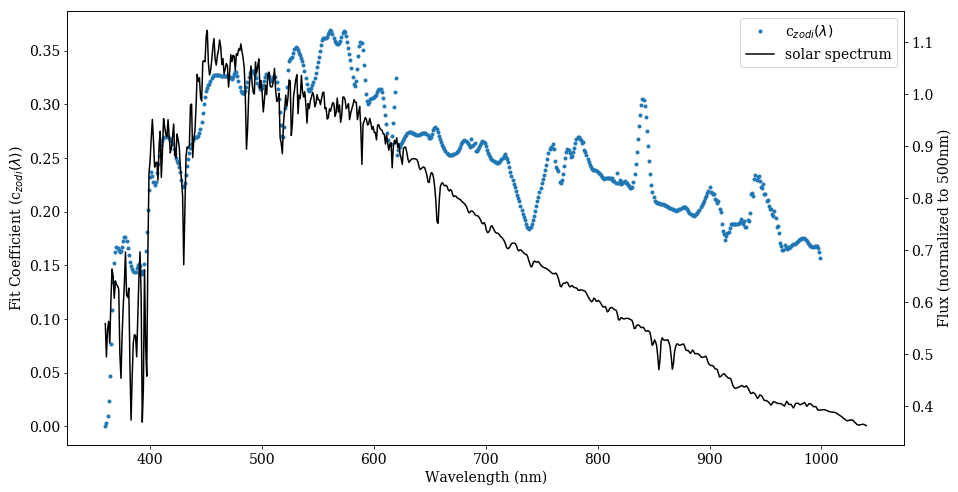

In [147]:
fig, ax1 = plt.subplots(1,figsize = (15,8))
ln1 = ax1.plot(MoonResults['wl'], MoonResults['c_zodi'],'.',label = 'c$_{zodi}(\lambda)$')
ax1.set_ylabel('Fit Coefficient (c$_{zodi}(\lambda)$)')
#ln1 = ax1.plot(ResultsD['wl'], ResultsD['c_zodi'],'rx')
ax2 = ax1.twinx()

ln2 = ax2.plot(wave_range, zodi_abs, 'k-',label = 'solar spectrum')
ax2.set_ylabel('Flux (normalized to 500nm)')

lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper right')
ax1.set_xlabel("Wavelength (nm)")
plt.savefig('/Users/parkerf/Research/Thesis/thesis_doc/images/c_zodi.png')

## ISL

In [128]:
wave_range = np.linspace(360,1040,(1040-360))
mattila = np.loadtxt('/Users/parkerf/Research/SkyModel/BOSS_Sky/SkyModel/files/mattila.csv')
isl_s = interpolate.interp1d(mattila[:,0]/10., mattila[:,1], bounds_error = False, fill_value="extrapolate")
isl_spectrum = isl_s(wave_range)
        
nm_440 = [np.abs(440. - w) for w in wave_range]
idx = np.argmin(nm_440)
relative_isl = isl_spectrum/isl_spectrum[idx]

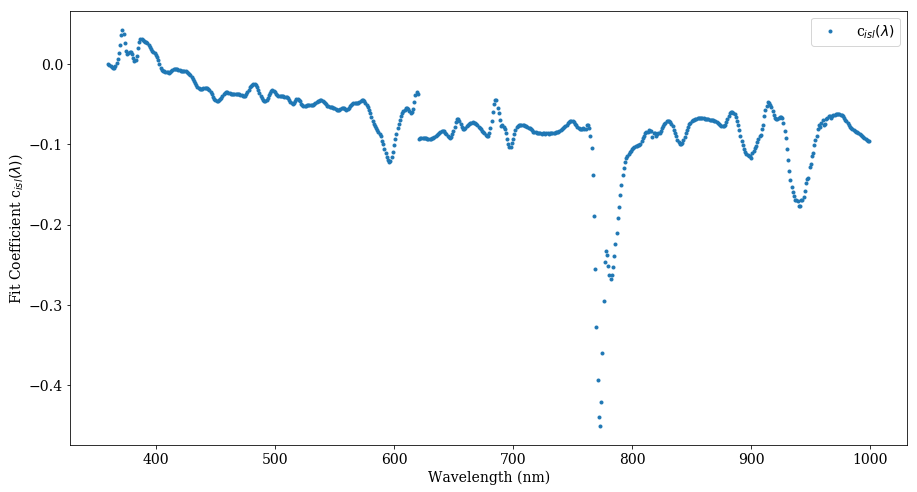

In [98]:
#ResultsX = pd.concat(ResultsX)
fig, ax1 = plt.subplots(1,figsize = (15,8))
ax1.plot(MoonResults['wl'], MoonResults['c_isl'],'.',label = 'c$_{isl}(\lambda)$')
ax1.set_ylabel('Fit Coefficient c$_{isl}(\lambda)$)')
#ax1.set_ylim(-0.5,0.1)
#ln1 = ax1.plot(ResultsD['wl'], ResultsD['c_isl'],'rx')
#ax2 = ax1.twinx()

#ln2 = ax2.plot(wave_range, relative_isl, 'k-',label = 'ISL Spectrum')

#lns = ln1 + ln2
#labs = [l.get_label() for l in lns]
ax1.legend(loc='upper right')
ax1.set_xlabel("Wavelength (nm)")
ax2.set_ylabel('Flux (normalized to 440nm)')
plt.savefig('/Users/parkerf/Research/Thesis/thesis_doc/images/isl_fit.png')

## Solar Flux

In [105]:
SS = BSMeta[(BSMeta['MOON_ALT']<0)&(BSMeta['SUN_ALT']<18)]


67.870667

251.82124

In [107]:
SMax['cont_b_510']/SMin['cont_b_510']

1.474871

In [108]:
sort = np.argsort(np.array(MoonResults['wl']))
wl = np.array(MoonResults['wl'])[sort]
sol = np.array(MoonResults['sol'])[sort]
ii = np.array(MoonResults['I'])[sort]

In [111]:
solar_data = np.load('/Users/parkerf/Research/SkyModel/BOSS_Sky/SkyModel/ContModel/files/solar_flux.npy')
solar_flux = interp1d(solar_data['MJD'], solar_data['fluxobsflux'], bounds_error=False, fill_value = 0)

In [120]:
np.mean(solar_flux(SMin['MJD'] - ii))

69.092295010352785

In [123]:
from astropy.time import Time
tt = Time(SMax['MJD'], format='mjd')

In [126]:
tt.datetime.year

2014

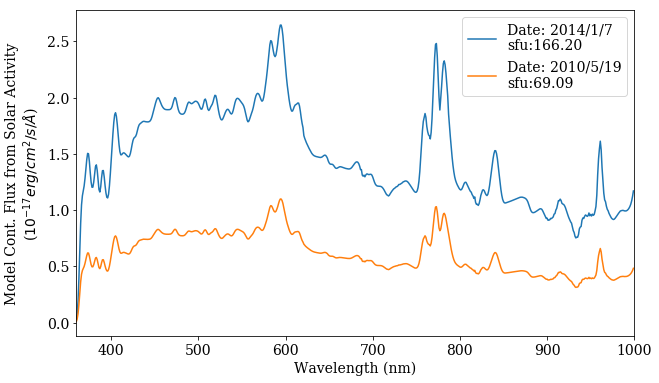

In [132]:
SMin = SS[np.argmin(SS['SOLARFLUX'])]
SMin['SOLARFLUX']

SMax = SS[np.argmax(SS['SOLARFLUX'])]
SMax['SOLARFLUX']

sfmax = sol*solar_flux(SMax['MJD'] - ii)
sfmin = sol*solar_flux(SMin['MJD'] - ii)
maxtt = Time(SMax['MJD'], format='mjd')
mintt = Time(SMin['MJD'], format='mjd')

plt.figure(figsize=(10,6))
plt.plot(wl, sfmax, label = 'Date: %d/%d/%d\nsfu:%.2f' %(maxtt.datetime.year, maxtt.datetime.month, maxtt.datetime.day, np.mean(solar_flux(SMax['MJD'] - ii))))
plt.plot(wl, sfmin, label = 'Date: %d/%d/%d\nsfu:%.2f' %(mintt.datetime.year, mintt.datetime.month, mintt.datetime.day, np.mean(solar_flux(SMin['MJD'] - ii))))
plt.legend()
plt.xlim(360,1000)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Model Cont. Flux from Solar Activity\n($10^{-17} erg/cm^{2}/s/\AA$)")
plt.savefig('/Users/parkerf/Research/Thesis/thesis_doc/images/sf_model_flux.png')

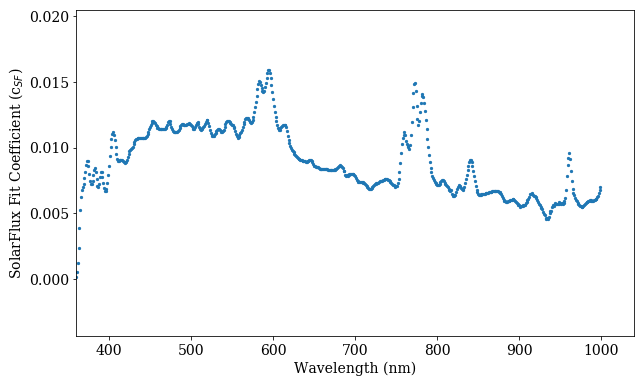

In [149]:
plt.figure(figsize=(10,6))
plt.scatter(MoonResults['wl'], MoonResults['sol'],s = 5)
#plt.plot(ResultsD['wl'], ResultsD['sol'],'rx')
plt.xlim(360,1040)
plt.xlabel("Wavelength (nm)")
plt.ylabel("SolarFlux Fit Coefficient (c$_{SF}$)")
plt.savefig('/Users/parkerf/Research/Thesis/thesis_doc/images/c_sol.png')

0.43077899940063025

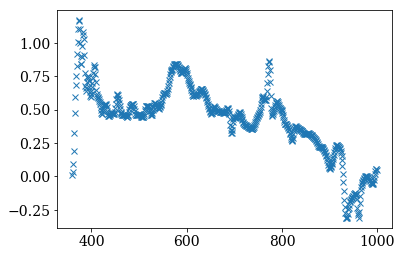

In [143]:
plt.plot(MoonResults['wl'], MoonResults['nov'],'x')
np.mean(MoonResults['nov'])

-0.25175522667592365

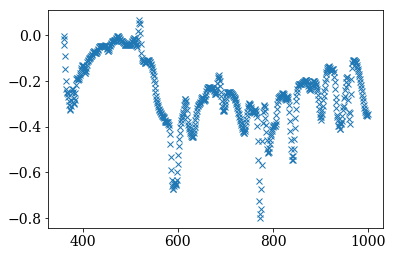

In [142]:
plt.plot(MoonResults['wl'], MoonResults['feb'],'x')
np.mean(MoonResults['feb'])

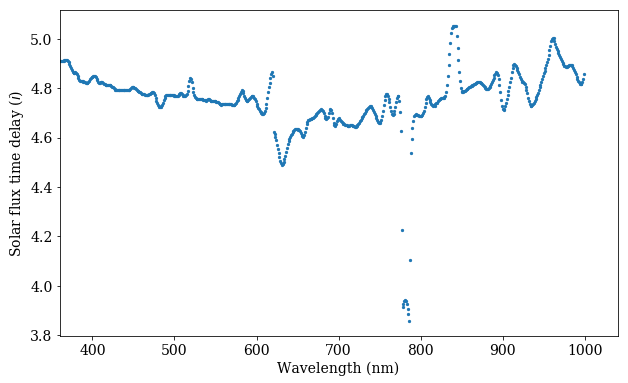

In [152]:
plt.figure(figsize=(10,6))
plt.scatter(MoonResults['wl'], MoonResults['I'],s = 5)
#plt.plot(ResultsD['wl'], ResultsD['sol'],'rx')
plt.xlim(360,1040)
#plt.ylim(4,6)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Solar flux time delay ($i$)")
plt.savefig('/Users/parkerf/Research/Thesis/thesis_doc/images/time_delay.png')

## Twilight

In [21]:
from scipy.interpolate import interp1d

In [22]:
wave_range = np.linspace(360,1040,(1040-360))
sun_s = np.loadtxt('/Users/parkerf/Research/SkyModel/BOSS_Sky/SkyModel/files/solarspec.txt')
sun_s = interp1d(sun_s[:,1], sun_s[:,2], bounds_error = False, fill_value=0)
solar_spectrum = sun_s(wave_range*10)

(836, 844)

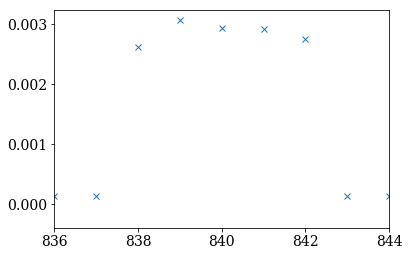

In [25]:
plt.plot(TwiResults['wl'], TwiResults['t2'],'x')
#plt.ylim(0,.002)
plt.xlim(836,844)

In [26]:
idx = np.where((TwiResults['wl']>835)&(TwiResults['wl']<844))
T = np.delete(np.array(TwiResults),idx)

In [17]:
TwiResults = TwiResults[(TwiResults['wl']>380)|(TwiResults['wl']<835)|(TwiResults['wl']>844)]

In [18]:
sort = np.argsort(np.array(TwiResults['wl']))

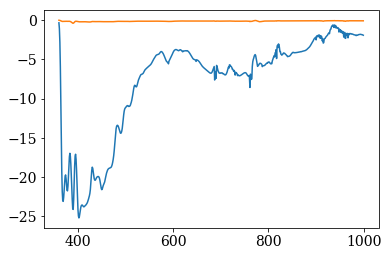

In [35]:
plt.plot(wl, t0,'-')
plt.plot(wl, t3,'-')

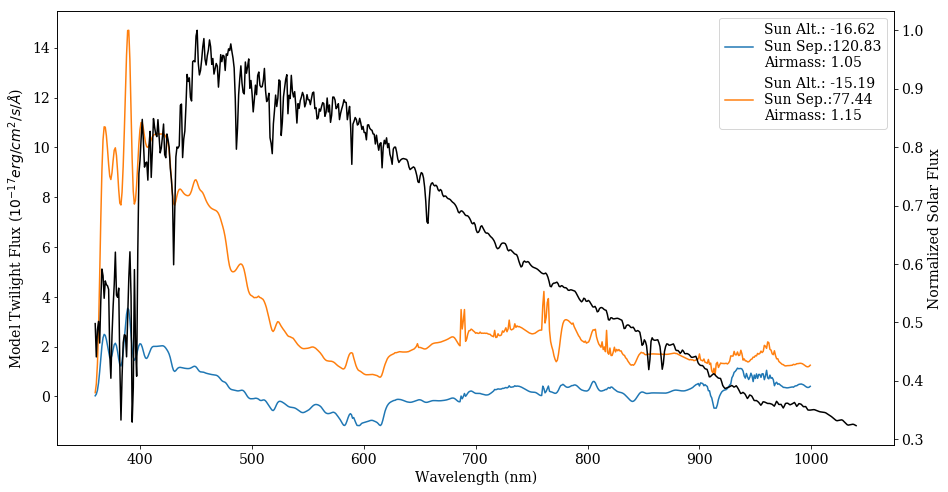

In [144]:
fig, ax1 = plt.subplots(1,figsize = (15,8))
TwiObs = BSMeta[(BSMeta['MOON_ALT']<0)&(BSMeta['SUN_ALT']>-18)]
Twi1 = np.random.choice(TwiObs,1)
Twi2 = np.random.choice(TwiObs,1)

t0 = np.array(TwiResults['t0'])[sort]
t1 = np.array(TwiResults['t1'])[sort]
t2 = np.array(TwiResults['t2'])[sort]
t3 = np.array(TwiResults['t3'])[sort]
t4 = np.array(TwiResults['t4'])[sort]
wl = np.array(TwiResults['wl'])[sort]
c0 = np.array(TwiResults['c0'])[sort]

#ln2 = ax1.semilogy(wl, t2,label = '$c_{T2}$')
#l#n1 = ax1.plot(wl, (t0*np.exp(-t4) - np.min(t0*np.exp(-t4)))/(np.max(t0*np.exp(-t4)) - np.min(t0*np.exp(-t4))) ,'-',label = '$c_{T0}$')
#ln2 = ax1.plot(wl, (t1*np.exp(-t4) - np.min(t1*np.exp(-t4)))/(np.max(t1*np.exp(-t4)) - np.min(t1*np.exp(-t4))) ,'-',label = '$c_{T1}$')
#ln3 = ax1.plot(wl, (t2*np.exp(-t4) - np.min(t2*np.exp(-t4)))/(np.max(t2*np.exp(-t4)) - np.min(t2*np.exp(-t4))) ,'-',label = '$c_{T2}$')
#ln4 = ax1.plot(wl, (t3*np.exp(-t4) - np.min(t3*np.exp(-t4)))/(np.max(t3*np.exp(-t4)) - np.min(t3*np.exp(-t4))) ,'-',label = '$c_{T3}$')
twi1 = (t0*np.abs(Twi1['SUN_ALT']) + t1*(np.abs(Twi1['SUN_ALT']))**2 +  t2*np.abs(Twi1['SUN_SEP']) **2 + t3*np.abs(Twi1['SUN_SEP'])) * np.exp(-t4*Twi1['AIRMASS'])+c0  
twi2 = (t0*np.abs(Twi2['SUN_ALT']) + t1*(np.abs(Twi2['SUN_ALT']))**2 +  t2*np.abs(Twi2['SUN_SEP']) **2 + t3*np.abs(Twi2['SUN_SEP'])) * np.exp(-t4*Twi2['AIRMASS'])+c0  
ln1 = ax1.plot(wl, twi1,'-',label='Sun Alt.: %.2f\nSun Sep.:%.2f\nAirmass: %.2f'%(Twi1['SUN_ALT'], Twi1['SUN_SEP'], Twi1['AIRMASS']))
ln2 = ax1.plot(wl, twi2,'-',label='Sun Alt.: %.2f\nSun Sep.:%.2f\nAirmass: %.2f'%(Twi2['SUN_ALT'], Twi2['SUN_SEP'], Twi2['AIRMASS']))
ax1.set_ylabel('Model Twilight Flux ($10^{-17} erg/cm^{2}/s/\AA$)')

ax2 = ax1.twinx()
ax2.plot(wave_range, solar_spectrum/np.max(solar_spectrum), 'k-',label = 'solar spectrum')

#lns = ln1 + ln2 #+ ln3 + ln4 + ln5
#labs = [l.get_label() for l in lns]
ax1.legend(loc='upper right')
ax1.set_xlabel("Wavelength (nm)")
ax2.set_ylabel('Normalized Solar Flux')
plt.savefig('/Users/parkerf/Research/Thesis/thesis_doc/images/c_T1.png')

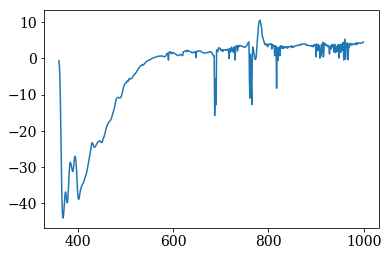

In [58]:
plt.plot(wl,t0*np.abs(Twi['SUN_ALT'])+t1*(np.abs(Twi['SUN_ALT']))**2 + c0)

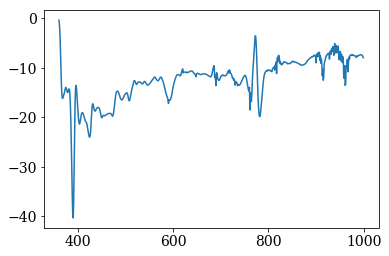

In [64]:
plt.plot(wl, t3*np.abs(Twi['SUN_SEP'])  )

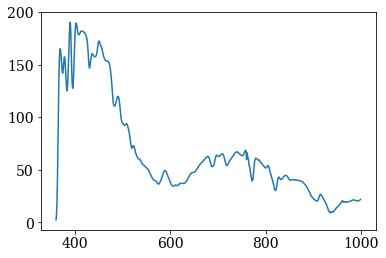

In [57]:
plt.plot(wl, c0)

In [37]:
Twi['SUN_ALT']

array([-16.68944411])

In [41]:
twi = (TwiResults['t0']*np.abs(Twi['SUN_ALT']) + TwiResults['t1']*(np.abs(Twi['SUN_ALT']))**2 +  TwiResults['t2']*np.abs(Twi['SUN_SEP']) **2 + TwiResults['t3']*np.abs(Twi['SUN_SEP'])) * np.exp(-TwiResults['t4']*Twi['AIRMASS'])+TwiResults['c0']  

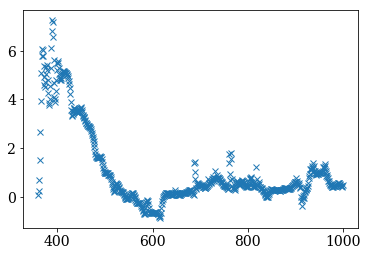

In [42]:
plt.plot(TwiResults['wl'], twi,'x')

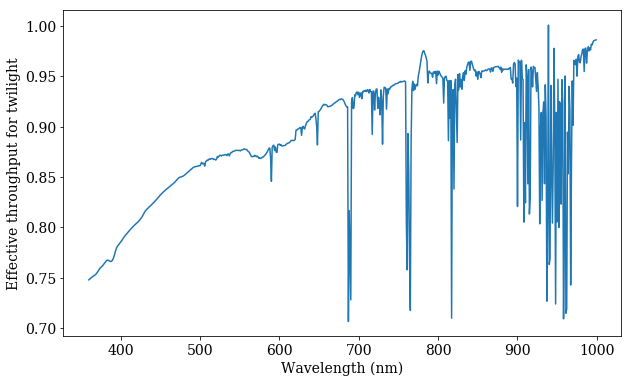

In [161]:
import numpy as np
plt.figure(figsize = (10,6))
#plt.plot(TwiResults['wl'], TwiResults['tau']*np.exp(-TwiResults['t4']),'-')
plt.plot(wl, np.exp(-t4),'-')
#plt.ylim(0.7,1)
plt.ylabel('Effective throughput for twilight')
plt.xlabel('Wavelength (nm)')
plt.savefig('/Users/parkerf/Research/Thesis/thesis_doc/images/c_tau_T.png')

### Moon

In [193]:
sort = np.argsort(np.array(MoonResults['wl']))
m0 = np.array(MoonResults['m0'])[sort]
m1 = np.array(MoonResults['m1'])[sort]
m2 = np.array(MoonResults['m2'])[sort]
m3 = np.array(MoonResults['m3'])[sort]
m4 = np.array(MoonResults['m4'])[sort]
m5 = np.array(MoonResults['m5'])[sort]
m6 = np.array(MoonResults['m6'])[sort]
c0 = np.array(MoonResults['c0'])[sort]
wl = np.array(MoonResults['wl'])[sort]

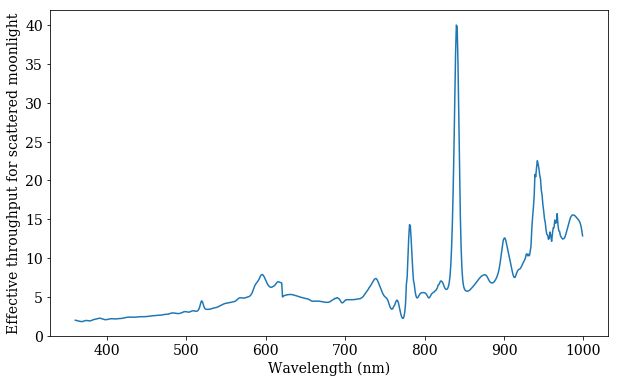

In [158]:
plt.figure(figsize = (10,6))
plt.plot(wl, np.exp(-m6),'-')
plt.ylabel('Effective throughput for scattered moonlight')
plt.xlabel('Wavelength (nm)')
plt.savefig('/Users/parkerf/Research/Thesis/thesis_doc/images/tau_M.png')

In [159]:
#calculate albedo
albedo_file = '/Users/parkerf/Research/SkyModel/BOSS_Sky/SkyModel/ContModel/files/albedo_constants.csv'
albedo_table = pd.read_csv(albedo_file, delim_whitespace=True) 
AlbedoConstants = {}
for constant in list(albedo_table):
    line = interp1d(albedo_table['WAVELENGTH'],albedo_table[constant],bounds_error=False, fill_value=0)
    AlbedoConstants[constant] = line 

In [160]:
def albedo(wl, moon_phase):
    p1 = 4.06054
    p2 = 12.8802
    p3 = -30.5858
    p4 = 16.7498
    A = []
    for i in range(4):
        A.append(AlbedoConstants['a%d'%i](wl)*(moon_phase**i))
    #for j in range(1,4):
    #    A.append(AlbedoConstants['b%s'%str(j)](wave)*(data_table['SOLAR_SELENO']**(2*j-1)))
    A.append(AlbedoConstants['d1'](wl)*np.exp(-moon_phase/p1))
    A.append(AlbedoConstants['d2'](wl)*np.exp(-moon_phase/p2))
    A.append(AlbedoConstants['d3'](wl)*np.cos((moon_phase-p3)/p4))
    lnA = np.sum(A,axis=0)
    Albedo = np.exp(lnA)
    return Albedo

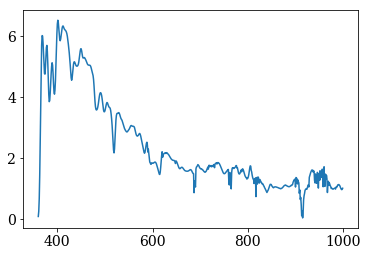

In [194]:
MoonObs = BSMeta[(BSMeta['MOON_ALT']>0)]

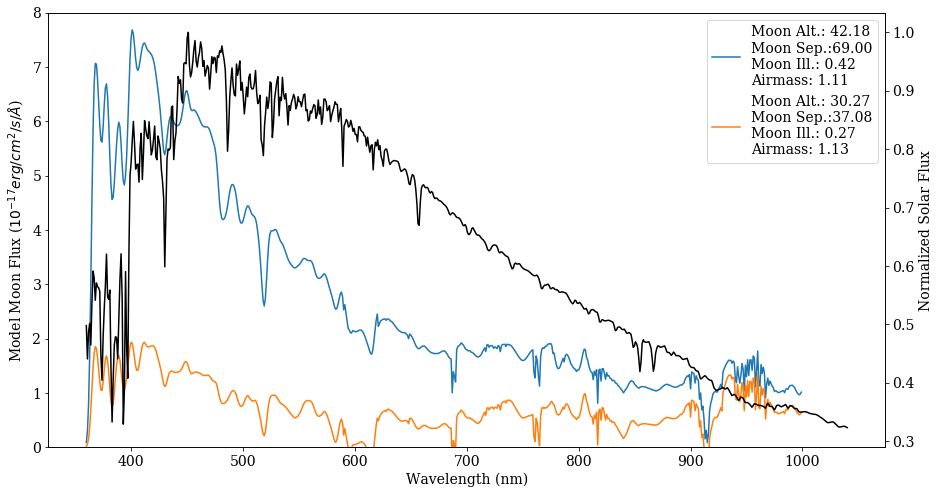

In [200]:

#MM = np.random.choice(MoonObs,1)
#MM1 = np.random.choice(MoonObs,1)
moon = (m0*MM['MOON_ALT']**2. + m1*MM['MOON_ALT'] + m2*MM['MOON_ILL']**2 + m3*MM['MOON_ILL'] + m4*MM["MOON_SEP"]**2. + m5*MM['MOON_SEP'])*np.exp(-m6*MM['AIRMASS'])*albedo(wl, MM['MOON_PHASE'])+c0
moon1 = (m0*MM1['MOON_ALT']**2. + m1*MM1['MOON_ALT'] + m2*MM1['MOON_ILL']**2 + m3*MM1['MOON_ILL'] + m4*MM1["MOON_SEP"]**2. + m5*MM1['MOON_SEP'])*np.exp(-m6*MM1['AIRMASS'])*albedo(wl, MM1['MOON_PHASE'])+c0
fig, ax1 = plt.subplots(1,figsize = (15,8))
plt.plot(wl, moon, '-',label='Moon Alt.: %.2f\nMoon Sep.:%.2f\nMoon Ill.: %.2f\nAirmass: %.2f'%(MM['MOON_ALT'], MM['MOON_SEP'], MM['MOON_ILL'], MM['AIRMASS']))
plt.plot(wl, moon1, '-',label='Moon Alt.: %.2f\nMoon Sep.:%.2f\nMoon Ill.: %.2f\nAirmass: %.2f'%(MM1['MOON_ALT'], MM1['MOON_SEP'], MM1['MOON_ILL'], MM1['AIRMASS']))

ax1.set_ylabel('Model Moon Flux ($10^{-17} erg/cm^{2}/s/\AA$)')

ax2 = ax1.twinx()
ax2.plot(wave_range, solar_spectrum/np.max(solar_spectrum), 'k-',label = 'solar spectrum')


ax1.legend( loc='upper right')
ax1.set_xlabel("Wavelength (nm)")
ax2.set_ylabel('Normalized Solar Flux')
ax1.set_ylim(0,8)
plt.savefig('/Users/parkerf/Research/Thesis/thesis_doc/images/c_M.png')

In [9]:
one_blue = '/Volumes/PFagrelius_Backup/sky_data/wave_arrays/blue_data_vector_500.npy'
one_red = '/Volumes/PFagrelius_Backup/sky_data/wave_arrays/red_data_vector_860.npy'

In [10]:
next_blue = '/Volumes/PFagrelius_Backup/sky_data/wave_arrays/blue_data_vector_600.npy'
next_red = '/Volumes/PFagrelius_Backup/sky_data/wave_arrays/red_data_vector_740.npy'

In [11]:
#Need to use sorted meta if using wavelength data
wl = os.path.splitext(one_blue)[0][-3:]
yy = np.load(one_blue)
BM_reg = Model.ContModel(yy, wl, 'blue', BSMeta)

BM_reg.run_dark_model()
BM_reg.run_twi_model()
BM_reg.run_moon_model()

wl = os.path.splitext(one_red)[0][-3:]
yy = np.load(one_red)
RM_reg = Model.ContModel(yy, wl, 'red', RSMeta)

RM_reg.run_dark_model()
RM_reg.run_twi_model()
RM_reg.run_moon_model()

In [12]:
wl = os.path.splitext(next_blue)[0][-3:]
yy = np.load(next_blue)
BM_out = Model.ContModel(yy, wl, 'blue', BSMeta)

BM_out.run_dark_model()
BM_out.run_twi_model()
BM_out.run_moon_model()

wl = os.path.splitext(next_red)[0][-3:]
yy = np.load(next_red)
RM_out = Model.ContModel(yy, wl, 'red', RSMeta)

RM_out.run_dark_model()
RM_out.run_twi_model()
RM_out.run_moon_model()

In [164]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

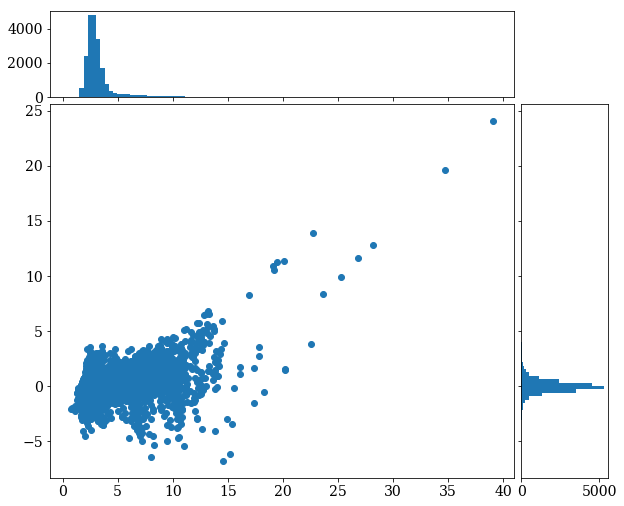

In [167]:
fig, ax =  plt.subplots(figsize=(10,10))
ax.scatter(BM_reg.ThisData, BM_reg.moon_resids)
ax.set_aspect(1.)

divider = make_axes_locatable(ax)
axHistx = divider.append_axes("top", 1.2, pad=0.1, sharex=ax)
axHisty = divider.append_axes("right", 1.2, pad=0.1, sharey=ax)
a = axHistx.hist(BM_reg.ThisData, bins=100)
b = axHisty.hist(BM_reg.moon_resids, bins=100, orientation='horizontal')

axHistx.xaxis.set_tick_params(labelbottom=False)
axHisty.yaxis.set_tick_params(labelleft=False)

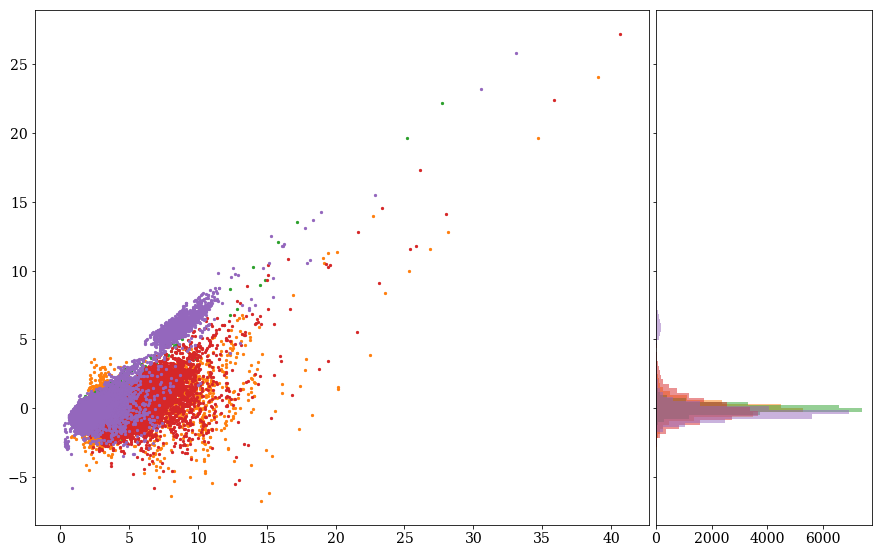

In [205]:
fig, ax = plt.subplots(1,figsize = (15,15))
divider = make_axes_locatable(ax)
axHisty = divider.append_axes("right",3, pad=0.1, sharey=ax)
for i, mod in enumerate([BM_reg, RM_reg, BM_out, RM_out]):
    ax.scatter(mod.ThisData, mod.moon_resids,s = 5,label = waves[i], color = colors[i])
    ax.set_aspect(1.)

    
    #axHistx = divider.append_axes("top", 1.5, pad=0.1, sharex=ax[i])
    
    #a = axHistx.hist(mod.ThisData, bins=100, color = colors[i])
    b = axHisty.hist(mod.moon_resids, bins=100, orientation='horizontal', color = colors[i], alpha = 0.5)

    #axHistx.xaxis.set_tick_params(labelbottom=False)
    axHisty.yaxis.set_tick_params(labelleft=False)

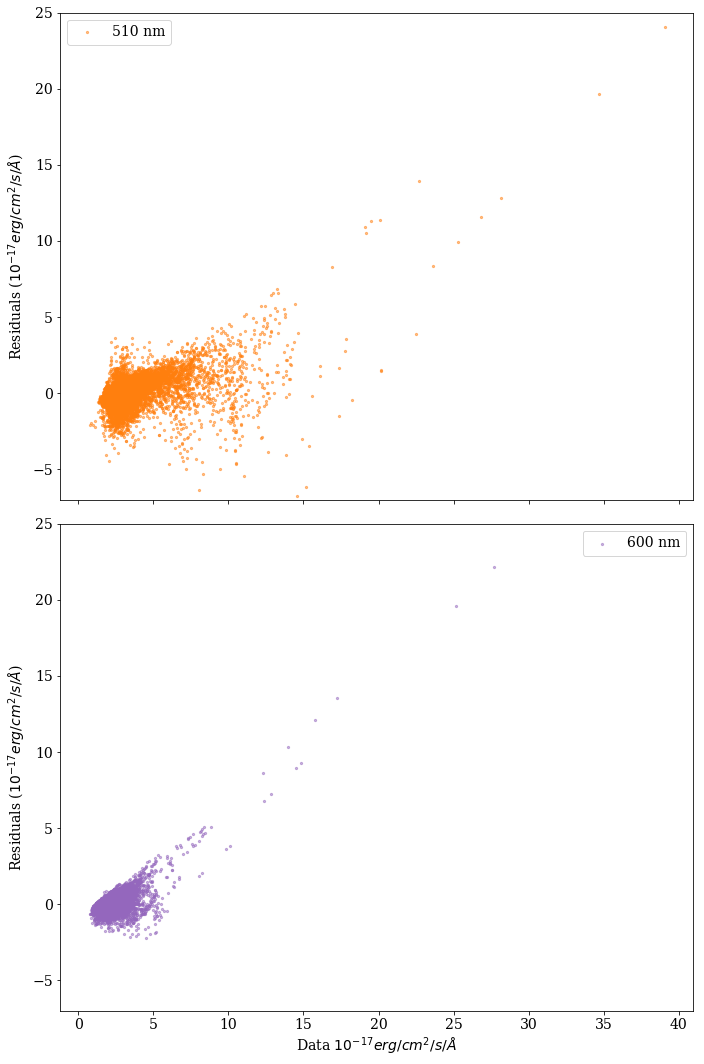

In [246]:
fig, axes = plt.subplots(2,1, sharex = True, sharey=True, figsize=(10,15))
ax = axes.ravel()
#divider1 = make_axes_locatable(ax[1])
#axHisty1 = divider1.append_axes("right",2, pad=0.1, sharey=ax[1])
ax[0].scatter(BM_reg.ThisData, BM_reg.moon_resids,s = 5,label = waves[0], color = colors[0],alpha= 0.5)
#ax[1].scatter(BM_out.ThisData, BM_out.moon_resids,s = 5,label = waves[1], color = colors[1],alpha = 0.5)
#ax[1].set_aspect(1.)
#b = axHisty1.hist(BM_reg.moon_resids, bins=100, orientation='horizontal', color = colors[0], alpha = 0.5)
#b = axHisty1.hist(BM_out.moon_resids, bins=100, orientation='horizontal', color = colors[1], alpha = 0.5)
#axHisty1.yaxis.set_tick_params(labelleft=False)
ax[0].legend()
#ax[1].legend()

#divider2 = make_axes_locatable(ax[3])
#axHisty2 = divider2.append_axes("right",2, pad=0.1, sharey=ax[3])
ax[1].scatter(RM_reg.ThisData, RM_reg.moon_resids,s = 5,label = waves[2], color = colors[3],alpha = 0.5)
#ax[3].scatter(RM_out.ThisData, RM_out.moon_resids,s = 5,label = waves[3], color = colors[3], alpha = 0.5)
#ax[2].set_aspect(1.)
#ax[3].set_aspect(1.)
#b = axHisty2.hist(RM_reg.moon_resids, bins=100, orientation='horizontal', color = colors[2], alpha = 0.5)
#b = axHisty2.hist(RM_out.moon_resids, bins=100, orientation='horizontal', color = colors[3], alpha = 0.5)
#axHisty2.yaxis.set_tick_params(labelleft=False)
ax[1].legend()
#ax[3].legend()
ax[0].set_ylim(-7,25)
ax[1].set_ylim(-7,25)
ax[0].set_ylabel('Residuals ($10^{-17} erg/cm^{2}/s/\AA$)')
ax[1].set_ylabel('Residuals ($10^{-17} erg/cm^{2}/s/\AA$)')
ax[1].set_xlabel('Data $10^{-17} erg/cm^{2}/s/\AA$')

plt.tight_layout()

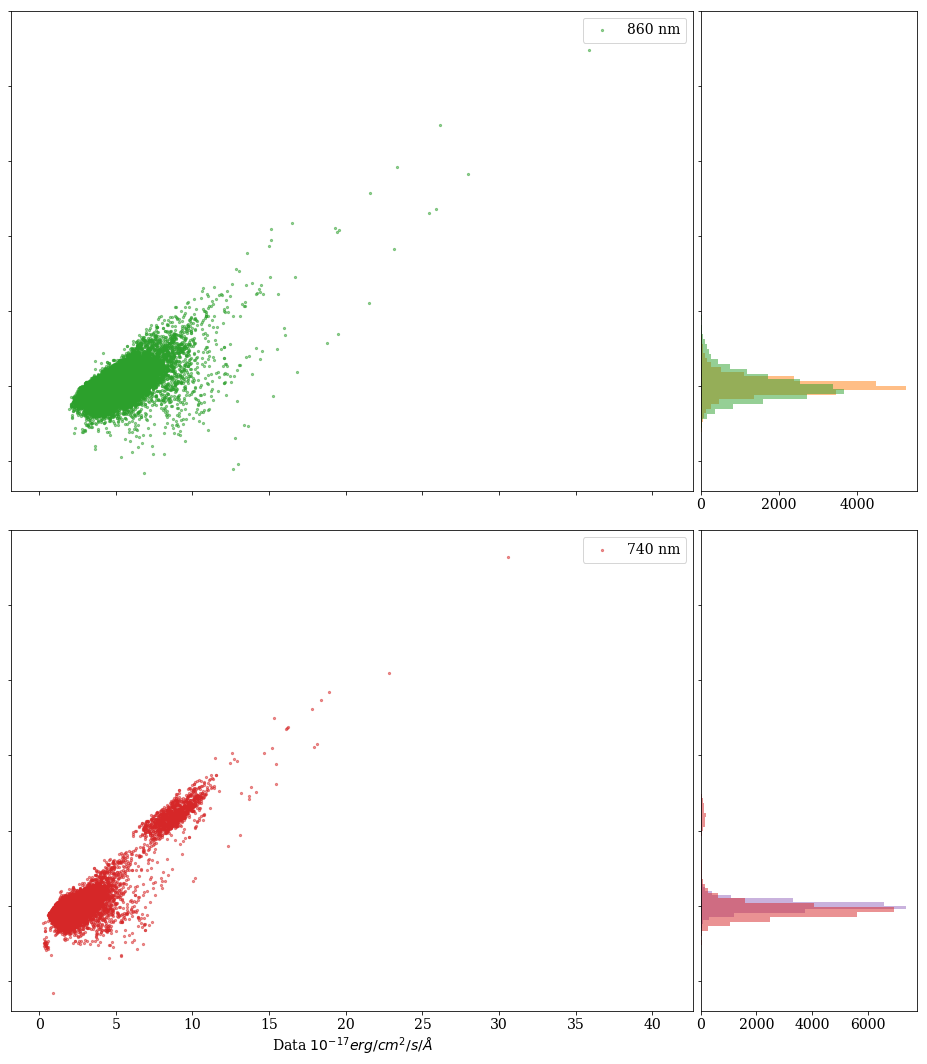

In [248]:
fig, axes = plt.subplots(2,1,sharey = True, sharex = True, figsize=(13.1,15))
ax = axes.ravel()
divider1 = make_axes_locatable(ax[0])
axHisty1 = divider1.append_axes("right",3, pad=0.1, sharey=ax[0])
#ax[0].scatter(BM_reg.ThisData, BM_reg.moon_resids,s = 5,label = waves[0], color = colors[0],alpha= 0.5)
ax[0].scatter(BM_out.ThisData, BM_out.moon_resids,s = 5,label = waves[1], color = colors[1],alpha = 0.5)
#ax[0].set_aspect(1.)
b = axHisty1.hist(BM_reg.moon_resids, bins=100, orientation='horizontal', color = colors[0], alpha = 0.5)
b = axHisty1.hist(BM_out.moon_resids, bins=100, orientation='horizontal', color = colors[1], alpha = 0.5)
axHisty1.yaxis.set_tick_params(labelleft=False)
ax[0].legend()
#ax[1].legend()

divider2 = make_axes_locatable(ax[1])
axHisty2 = divider2.append_axes("right",3, pad=0.1, sharey=ax[1])
#ax[1].scatter(RM_reg.ThisData, RM_reg.moon_resids,s = 5,label = waves[2], color = colors[2],alpha = 0.5)
ax[1].scatter(RM_out.ThisData, RM_out.moon_resids,s = 5,label = waves[3], color = colors[2], alpha = 0.5)
#ax[1].set_aspect(1.)
#ax[3].set_aspect(1.)
b = axHisty2.hist(RM_reg.moon_resids, bins=100, orientation='horizontal', color = colors[3], alpha = 0.5)
b = axHisty2.hist(RM_out.moon_resids, bins=100, orientation='horizontal', color = colors[2], alpha = 0.5)
axHisty2.yaxis.set_tick_params(labelleft=False)
ax[1].legend()
#ax[3].legend()
ax[0].set_yticklabels([])
ax[1].set_yticklabels([])
ax[0].set_ylim(-7,25)
ax[1].set_ylim(-7,25)
ax[1].set_xlabel('Data $10^{-17} erg/cm^{2}/s/\AA$')
plt.tight_layout()

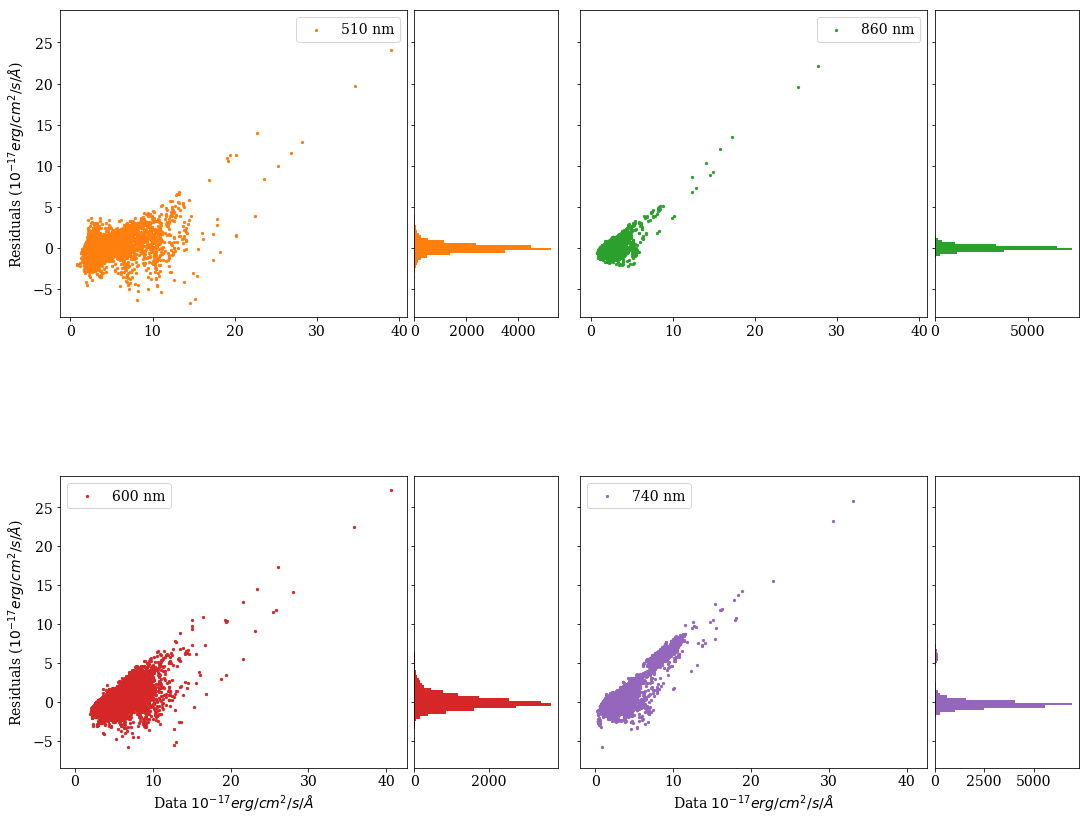

In [201]:
fig, axes = plt.subplots(1,2, sharey = True,sharex = 'row', figsize = (15,15))
ax = axes.ravel()
colors = ['C1','C2','C3','C4']
waves = ['510 nm', '860 nm', '600 nm', '740 nm']
for i, mod in enumerate([BM_reg, RM_reg, BM_out, RM_out]):
    ax[i].scatter(mod.ThisData, mod.moon_resids,s = 5,label = waves[i], color = colors[i])
    ax[i].set_aspect(1.)

    divider = make_axes_locatable(ax[i])
    #axHistx = divider.append_axes("top", 1.5, pad=0.1, sharex=ax[i])
    axHisty = divider.append_axes("right", 2, pad=0.1, sharey=ax[i])
    #a = axHistx.hist(mod.ThisData, bins=100, color = colors[i])
    b = axHisty.hist(mod.moon_resids, bins=100, orientation='horizontal', color = colors[i])

    #axHistx.xaxis.set_tick_params(labelbottom=False)
    axHisty.yaxis.set_tick_params(labelleft=False)
    #ax[i].set_ylabel('Residuals ($10^{-17} erg/cm^{2}/s/\AA$)')
    #ax[i].set_xlabel('Data $10^{-17} erg/cm^{2}/s/\AA$')
    #ax[i].set_ylabel('Residuals ($10^{-17} erg/cm^{2}/s/\AA$)')

    ax[i].legend()

fig.tight_layout()
ax[0].set_ylabel('Residuals ($10^{-17} erg/cm^{2}/s/\AA$)')
ax[2].set_ylabel('Residuals ($10^{-17} erg/cm^{2}/s/\AA$)')
ax[2].set_xlabel('Data $10^{-17} erg/cm^{2}/s/\AA$')
ax[3].set_xlabel('Data $10^{-17} erg/cm^{2}/s/\AA$')


plt.savefig('/Users/parkerf/Research/Thesis/thesis_doc/images/resids.png')

In [206]:
boutliers = np.where((BM.moon_resids>4)|(BM.moon_resids<-4))

In [207]:
wave = np.linspace(300,1040,(1040-300)*100)

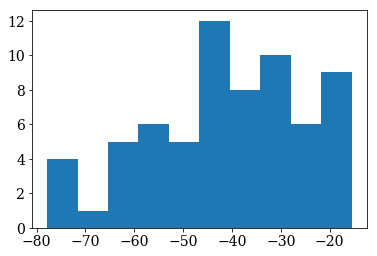

In [51]:
ret = plt.hist(BSMeta[boutliers]['SUN_ALT'])

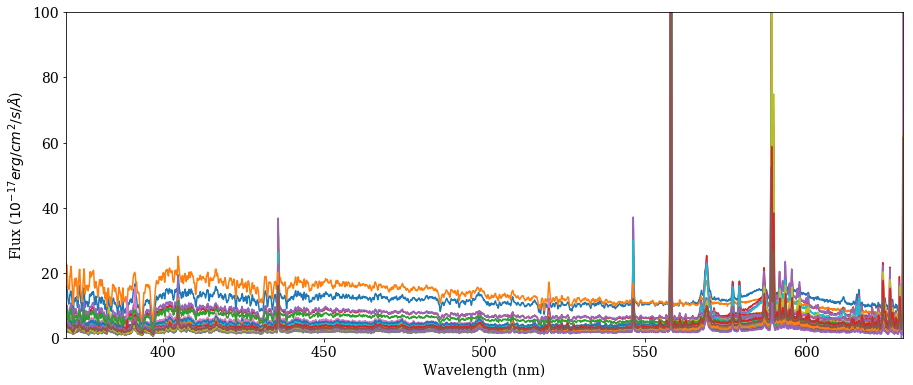

In [45]:
plt.figure(figsize=(15,6))
for line in BSMeta[boutliers]:
    try:
        filen = '/Volumes/PFagrelius_Backup/sky_data/sky_mean_spectra/%d/%d_%s_mean_spectrum.npy'%(int(line['PLATE']),int(line['IMG']),str(line['CAMERAS']))
        plt.plot(wave, np.load(filen))
    except:
        print(int(line['ids']))
plt.xlim(370,630)
plt.ylim(0,100)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Flux ($10^{-17} erg/cm^{2}/s/\AA$)")
plt.savefig('/Users/parkerf/Research/Thesis/thesis_doc/images/blue_outlier_spectrum.png')

In [46]:
routliers = np.where((RM.moon_resids>2)|(RM.moon_resids<-2))

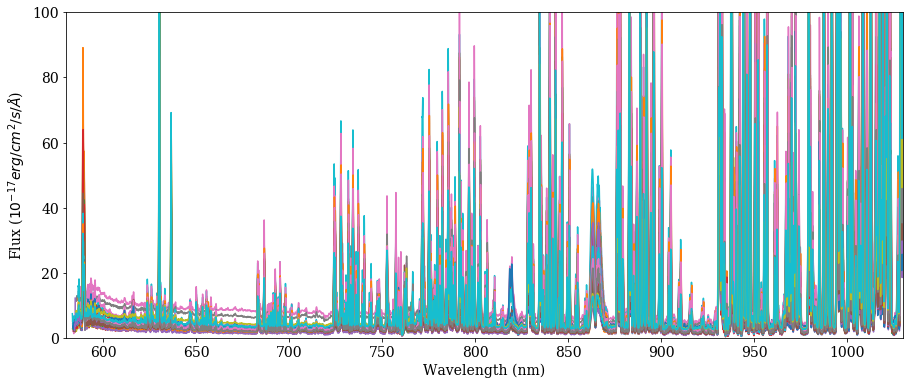

In [47]:
plt.figure(figsize=(15,6))
for line in RSMeta[routliers]:
    try:
        filen = '/Volumes/PFagrelius_Backup/sky_data/sky_mean_spectra/%d/%d_%s_mean_spectrum.npy'%(int(line['PLATE']),int(line['IMG']),str(line['CAMERAS']))
        plt.plot(wave, np.load(filen))
    except:
        print(int(line['ids']))
plt.xlim(580,1030)
plt.ylim(0,100)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Flux ($10^{-17} erg/cm^{2}/s/\AA$)")
plt.savefig('/Users/parkerf/Research/Thesis/thesis_doc/images/red_outlier_spectrum.png')

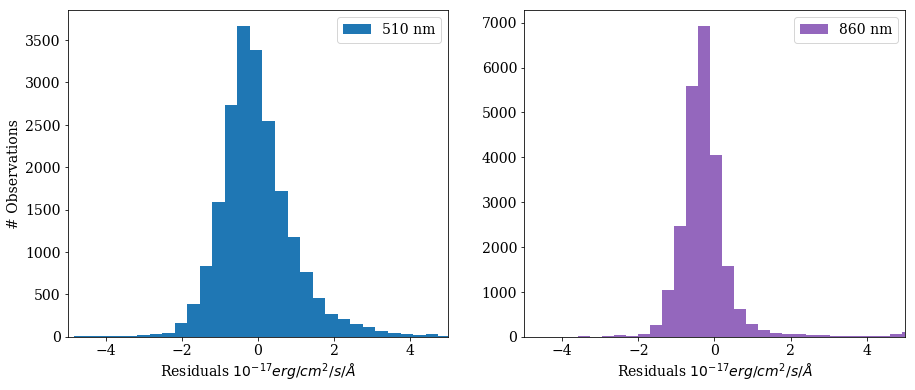

In [213]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (15,6))
ax1.hist(BM.moon_resids,bins=100, label = '510 nm')
ax1.set_xlabel('Residuals $10^{-17} erg/cm^{2}/s/\AA$')
ax1.set_ylabel("# Observations")
ax1.legend()
ax1.set_xlim(-5,5)

ax2.hist(RM.moon_resids,bins=100,color='C4',label = '860 nm')
ax2.set_xlabel('Residuals $10^{-17} erg/cm^{2}/s/\AA$')

ax2.legend()
ax2.set_xlim(-5,5)
plt.savefig('/Users/parkerf/Research/Thesis/thesis_doc/images/norm_resids1.png')

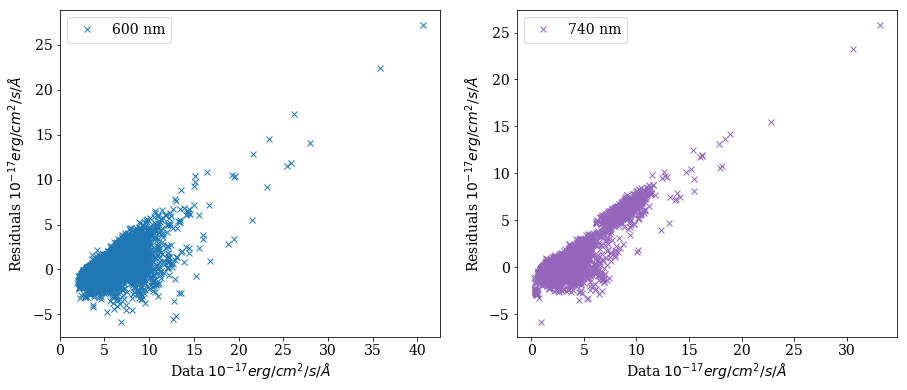

In [214]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (15,6))
ax1.plot(BM.ThisData, BM.moon_resids,'x', label = '600 nm')
ax1.set_xlabel('Data $10^{-17} erg/cm^{2}/s/\AA$')
ax1.set_ylabel('Residuals $10^{-17} erg/cm^{2}/s/\AA$')
ax1.legend()

ax2.plot(RM.ThisData, RM.moon_resids,'x',color = 'C4',label = '740 nm')
ax2.set_xlabel('Data $10^{-17} erg/cm^{2}/s/\AA$')
ax2.set_ylabel('Residuals $10^{-17} erg/cm^{2}/s/\AA$')
ax2.legend()

fig, (ax1,ax2) = plt.subplots(1,2, figsize = (15,6))
ax1.hist(BM.moon_resids,bins=100, label = '600 nm')
ax1.set_xlabel('Residuals $10^{-17} erg/cm^{2}/s/\AA$')
ax1.set_ylabel("# Observations")
ax1.legend()
#ax1.set_xlim(-5,5)

ax2.hist(RM.moon_resids,bins=100,color='C4',label = '740 nm')
ax2.set_xlabel('Residuals $10^{-17} erg/cm^{2}/s/\AA$')
ax2.legend()

plt.savefig('/Users/parkerf/Research/Thesis/thesis_doc/images/outlier_resids.png')

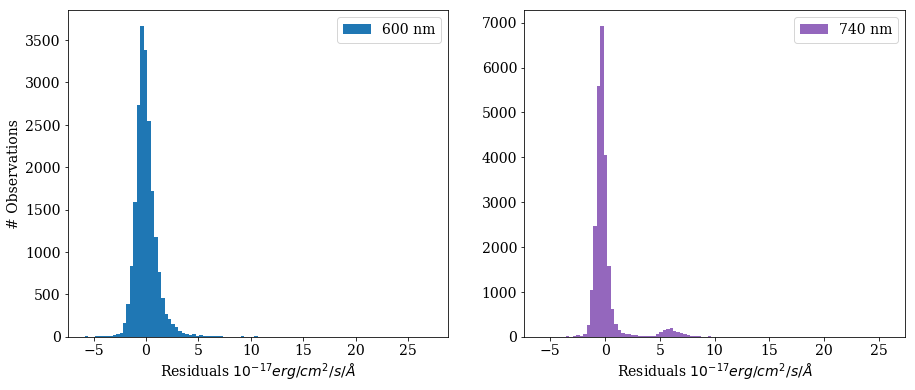

In [215]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (15,6))
ax1.hist(BM.moon_resids,bins=100, label = '600 nm')
ax1.set_xlabel('Residuals $10^{-17} erg/cm^{2}/s/\AA$')
ax1.set_ylabel("# Observations")
ax1.legend()
#ax1.set_xlim(-5,5)

ax2.hist(RM.moon_resids,bins=100,color='C4',label = '740 nm')
ax2.set_xlabel('Residuals $10^{-17} erg/cm^{2}/s/\AA$')
ax2.legend()
#ax2.set_xlim(-5,5)
plt.savefig('/Users/parkerf/Research/Thesis/thesis_doc/images/outlier_resids1.png')

In [ ]:
plt.plot(MoonResults['wl'],MoonResults['c0'],'x')

## Test Model

In [42]:
import boss_sky as SkyModel

/Users/parkerf/anaconda3/lib/python3.5/site-packages/astropy/table/column.py:1096: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  ma.MaskedArray.__setitem__(self, index, value)


In [13]:
%autoreload

In [19]:
bright = BSMeta[BSMeta['MOON_ALT']>0]

In [20]:
obs = np.random.choice(bright,1)

In [414]:
bfilen = '/Volumes/PFagrelius_Backup/sky_data/sky_mean_spectra/%d/%d_b1_mean_spectrum.npy'%(int(obs['PLATE']),int(obs['IMG']))
rfilen = '/Volumes/PFagrelius_Backup/sky_data/sky_mean_spectra/%d/%d_r1_mean_spectrum.npy'%(int(obs['PLATE']),int(obs['IMG']))

In [415]:
S = SkyModel.SkySpectrum(obs['AIRMASS'], obs['ECL_LAT'], obs['TAI-BEG'], obs['GAL_LAT'], obs['GAL_LON'], obs['SUN_ALT'], obs['SUN_SEP'], obs['MOON_PHASE'], obs['MOON_ILL'], obs['MOON_SEP'], obs['MOON_ALT'])

In [416]:
w, cont = S.get_cont_spectrum()

In [401]:
print(obs['AIRMASS'], obs['ECL_LAT'], obs['TAI-BEG'], obs['GAL_LAT'], obs['GAL_LON'], obs['SUN_ALT'], obs['SUN_SEP'], obs['MOON_PHASE'], obs['MOON_ILL'], obs['MOON_SEP'], obs['MOON_ALT'])

[ 1.40737998] [ 10.9428942] [  4.86761390e+09] [ 41.60275984] [ 198.86569576] [-29.38102387] [ 161.96666204] [ 2.09588478] [ 0.24935523] [ 105.91325896] [ 29.06037231]


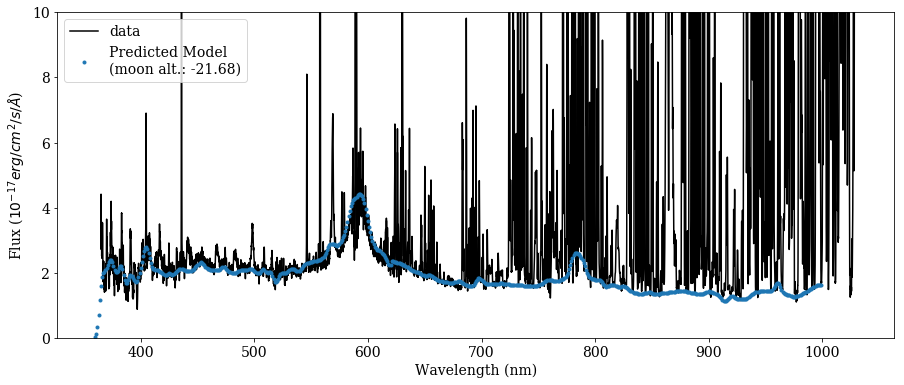

In [395]:
plt.figure(figsize = (15,6))
wave = np.linspace(300,1040,(1040-300)*100)
plt.plot(wave, np.load(bfilen),'k-',label = 'data')
plt.plot(wave, np.load(rfilen),'k-')
plt.plot(S.Results['wl'], S.model,'.',label = 'Predicted Model\n(moon alt.: %.2f)'%obs['MOON_ALT'])
plt.ylim(0,10)
plt.legend()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Flux ($10^{-17} erg/cm^{2}/s/\AA$)")
plt.savefig('/Users/parkerf/Research/Thesis/thesis_doc/images/model_predict_dark.png')

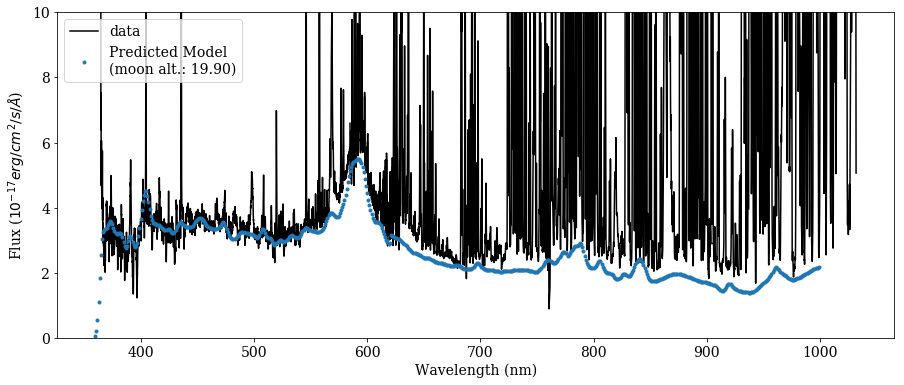

In [417]:
plt.figure(figsize = (15,6))
wave = np.linspace(300,1040,(1040-300)*100)
plt.plot(wave, np.load(bfilen),'k-',label = 'data')
plt.plot(wave, np.load(rfilen),'k-')
plt.plot(S.Results['wl'], S.model,'.',label = 'Predicted Model\n(moon alt.: %.2f)'%obs['MOON_ALT'])
plt.ylim(0,10)
plt.legend()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Flux ($10^{-17} erg/cm^{2}/s/\AA$)")
#plt.savefig('/Users/parkerf/Research/Thesis/thesis_doc/images/model_predict_bright.png')

In [124]:
data = bright['cont_b_480']

In [43]:
len(data)

3213

In [63]:
%autoreload

In [63]:
Model = []
for obs in bright:

    S = SkyModel.SkySpectrum(obs['AIRMASS'], obs['ECL_LAT'], obs['TAI-BEG'], obs['GAL_LAT'], obs['GAL_LON'], obs['SUN_ALT'], obs['SUN_SEP'], obs['MOON_PHASE'], obs['MOON_ILL'], obs['MOON_SEP'], obs['MOON_ALT'])
    w, cont = S.get_cont_spectrum()
    ww = S.Results['wl']
    cc = S.model
    idx = np.argmin(np.abs(ww-480))
#     plt.figure()
#     plt.plot(ww, cc,'.')
#     plt.show()
    Model.append(cc[idx])

In [125]:
from scipy.interpolate import interp1d
zen_ext = np.loadtxt('/Users/parkerf/Research/SkyModel/BOSS_Sky/SkyModel/files/ZenithExtinction-KPNO.dat')
zen_wave = zen_ext[:,0]/10.
ext = zen_ext[:,1]
zext = interp1d(zen_wave, ext, bounds_error=False, fill_value = 'extrapolate')

In [126]:
ext = 10**(-0.4*zext(480)*bright['AIRMASS'])
sky = np.array(data*ext)
model = np.array(Model)
res = sky/model

In [127]:
ok = np.where(model>0)
sky = sky[ok]
model = model[ok]
res = res[ok]

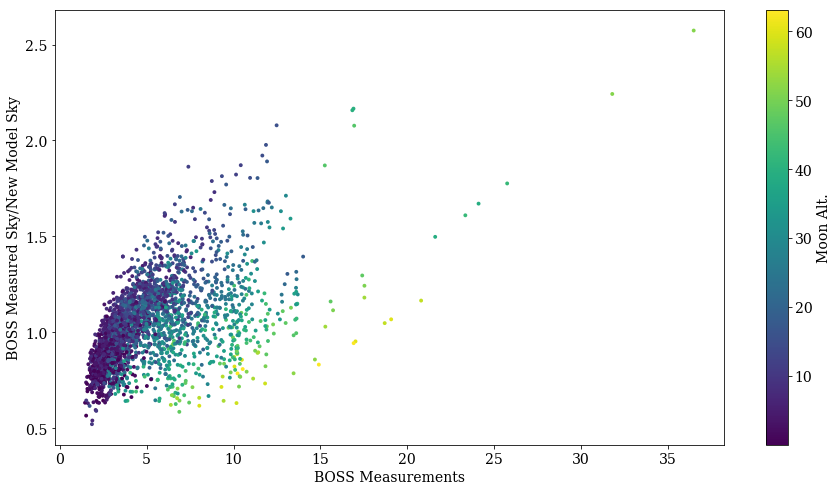

In [128]:
x = sky
y = model
v = bright['MOON_ALT'][ok]



# Calculate percentile limits.
#xmin, xmax = np.percentile(x, (1, 99))
#ymin, ymax = np.percentile(y, (1, 99))
#vmin, vmax = np.percentile(v, (1, 99))

fig, ax = plt.subplots(1, figsize=(15,8))

s = ax.scatter(x, res, s=15, lw=0, c=v)
plt.colorbar(s, ax=ax).set_label('Moon Alt.')
ax.set_xlabel('BOSS Measurements')
ax.set_ylabel('BOSS Measured Sky/New Model Sky')
plt.savefig('/Users/parkerf/Research/Thesis/thesis_doc/images/bright_new_model.png')

In [129]:
dark = BSMeta[(BSMeta['MOON_ALT']<0)&(BSMeta['AIRMASS']<1.4)&(BSMeta['SUN_ALT']<-18)&(BSMeta['GAL_LAT']>10)]

In [157]:
from astropy.io import fits
from astropy.time import Time, TimeDelta
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_sun, get_moon
from astropy import units as u 
import astropy.table

In [158]:
APACHE = EarthLocation.of_site('Apache Point')

In [159]:
start_time = Time(BSMeta['MJD'], scale='tai', format='mjd', location=APACHE)

In [163]:
max(start_time.datetime)

datetime.datetime(2014, 6, 5, 0, 0)

In [82]:
len(dark)

11224

In [130]:
data = dark['cont_b_480']

In [112]:
DDModel = []
for obs in dark:

    S = SkyModel.SkySpectrum(obs['AIRMASS'], obs['ECL_LAT'], obs['TAI-BEG'], obs['GAL_LAT'], obs['GAL_LON'], obs['SUN_ALT'], obs['SUN_SEP'], obs['MOON_PHASE'], obs['MOON_ILL'], obs['MOON_SEP'], obs['MOON_ALT'])
    w, cont = S.get_cont_spectrum()
    ww = S.Results['wl']
    cc = S.model
    idx = np.where((ww<480)&(ww>460))

#     plt.figure()
#     plt.plot(ww, cc,'.')
#     plt.show()
    DDModel.append(np.mean(cc[idx[0]]))

In [131]:
ext = 10**(-0.4*zext(480)*dark['AIRMASS'])
sky = np.array(data*ext)
model = np.array(DModel)
res = sky/model

In [132]:
ok = np.where(model>0)
sky = sky[ok]
model = model[ok]
res = res[ok]

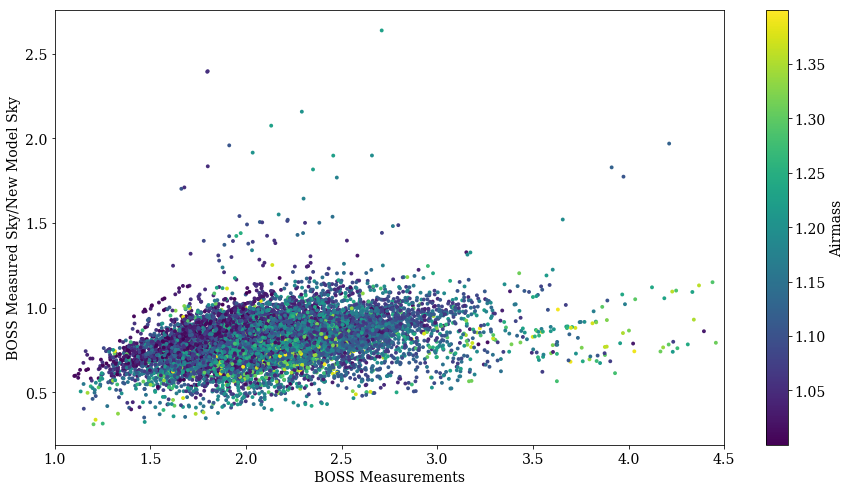

In [133]:
x = sky
y = model
v = dark['AIRMASS'][ok]



# Calculate percentile limits.
#xmin, xmax = np.percentile(x, (1, 99))
#ymin, ymax = np.percentile(y, (1, 99))
#vmin, vmax = np.percentile(v, (1, 99))

fig, ax = plt.subplots(1, figsize=(15,8))

s = ax.scatter(x, res, s=15, lw=0,c=v)
plt.colorbar(s, ax=ax).set_label('Airmass')
plt.xlim(1,4.5)
ax.set_xlabel('BOSS Measurements')
ax.set_ylabel('BOSS Measured Sky/New Model Sky')
#plt.colorbar(s, ax=ax).set_label('Moon Alt.')
plt.savefig('/Users/parkerf/Research/Thesis/thesis_doc/images/dark_new_model.png')

## How bright is continuum?

In [25]:
#RSMeta = astropy.table.Table.read('/Volumes/PFagrelius_Backup/sky_data/wave_arrays/red_sorted_good_mean_meta_071726.fits')
r_zen_dark = np.where((RSMeta['AIRMASS']<1.01)&(RSMeta['MOON_ALT']<0)&(RSMeta['SUN_ALT']<20)&(RSMeta['GAL_LAT']>30)&(RSMeta['ECL_LAT']>30))
r_dark = np.where((RSMeta['AIRMASS']<1.1)&(RSMeta['MOON_ALT']<-20)&(RSMeta['SUN_ALT']<-20)&(RSMeta['GAL_LAT']>30))

In [38]:
my_tai = np.random.choice(RSMeta[np.where((RSMeta[r_dark]['MONTH'] == 2)&(np.round(RSMeta[r_dark]['HOUR']) == 6))]['TAI-BEG'],1)

In [39]:
my_tai

array([  4.87263654e+09])

In [173]:
#RSMeta = astropy.table.Table.read('/Volumes/PFagrelius_Backup/sky_data/wave_arrays/red_sorted_good_mean_meta_071726.fits')
b_zen_dark = np.where((BSMeta['AIRMASS']<1.01)&(BSMeta['MOON_ALT']<0)&(BSMeta['SUN_ALT']<-18)&(BSMeta['GAL_LAT']>30)&(BSMeta['ECL_LAT']>30))
b_dark = np.where((BSMeta['AIRMASS']<1.4)&(BSMeta['MOON_ALT']<0)&(BSMeta['SUN_ALT']<-18)&(BSMeta['GAL_LAT']>10))

In [177]:
zen_time = Time(BSMeta[b_zen_dark]['MJD'], scale='tai', format='mjd', location=APACHE)

In [197]:
for yy in [2010, 2011, 2012, 2013, 2014]:
    D = []
    for i,t in enumerate(zen_time):
        if t.datetime.year == yy:
            D.append(BSMeta[b_zen_dark][i])
    print(yy, np.mean(np.vstack(D)['cont_b_510']))

2010 1.94145
2011 2.1514
2012 2.75662
2013 2.35925


ValueError: need at least one array to concatenate

1.9414461

In [88]:
S = SkyModel.SkySpectrum(1, 30, 70, my_tai[0], 35, 145, -25, 130, 2.4, 0.17, 130, -25,False)
w, cont = S.get_cont_spectrum()

In [101]:
ww = np.array(S.Results['wl'])
ii = np.argsort(ww)

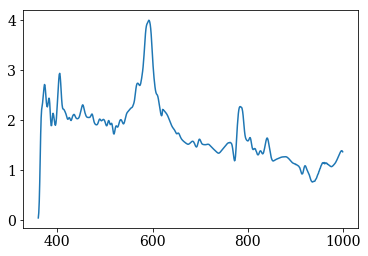

In [102]:
plt.plot(ww[ii],np.array(S.model)[ii])
#plt.plot(S.Results['wl'],S.model,'x')

In [112]:
DM = {70:{0:[],30:[],60:[], 90:[]},110:{0:[],30:[],60:[],90:[]},200:{0:[],30:[],60:[],90:[]}}
for sf in [70, 110, 200]:
    for el in [0,30,60,90]:
        S = SkyModel.SkySpectrum(1, el, sf, my_tai[0], 35, 145, -25, 130, 2.4, 0.17, 130, -25,False)
        w, cont = S.get_cont_spectrum()
        ww = np.array(S.Results['wl'])
        dd = np.array(S.model)
        ii = np.argsort(ww)
        ww = ww[ii]
        dd = dd[ii]
        idx = np.where((ww>450)&(ww<500))
        value0 = np.mean(dd[idx[0]])
        DM[sf][el].append(value0)
        S = SkyModel.SkySpectrum(1, el, sf, my_tai[0], 35, 145, -25, 130, 2.4, 0.17, 130, -25,True)
        w, cont = S.get_cont_spectrum()
        ww = np.array(S.Results['wl'])
        dd = np.array(S.model)
        ii = np.argsort(ww)
        ww = ww[ii]
        dd = dd[ii]
        idx = np.where((ww>450)&(ww<500))
        value = np.mean(dd[idx[0]])
        DM[sf][el].append(value0 - value)

In [113]:
for t in [70, 110, 200]:
    print('------------')
    print(t)
    for x in [0,30,60, 90]:
        print(x, DM[t][x])

------------
70
0 [2.7759779428103935, 1.7268801904911328]
30 [2.0564445301057548, 1.0073467777864942]
60 [1.672693376663281, 0.62359562434402038]
90 [1.5000053576141674, 0.45090760529490681]
------------
110
0 [3.240153471560868, 1.7268801904911331]
30 [2.5206200588562293, 1.0073467777864944]
60 [2.1368689054137553, 0.62359562434402038]
90 [1.9641808863646417, 0.45090760529490681]
------------
200
0 [4.2845484112494363, 1.7268801904911331]
30 [3.5650149985447963, 1.0073467777864931]
60 [3.1812638451023227, 0.62359562434401949]
90 [3.0085758260532094, 0.45090760529490614]


In [114]:
DM = {70:{0:[],30:[],60:[], 90:[]},110:{0:[],30:[],60:[],90:[]},200:{0:[],30:[],60:[],90:[]}}
for sf in [70, 110, 200]:
    for el in [0,30,60,90]:
        S = SkyModel.SkySpectrum(1, el, sf, my_tai[0], 35, 145, -25, 130, 2.4, 0.17, 130, -25,False)
        w, cont = S.get_cont_spectrum()
        ww = np.array(S.Results['wl'])
        dd = np.array(S.model)
        ii = np.argsort(ww)
        ww = ww[ii]
        dd = dd[ii]
        idx = np.where((ww>700)&(ww<750))
        value0 = np.mean(dd[idx[0]])
        DM[sf][el].append(value0)
        S = SkyModel.SkySpectrum(1, el, sf, my_tai[0], 35, 145, -25, 130, 2.4, 0.17, 130, -25,True)
        w, cont = S.get_cont_spectrum()
        ww = np.array(S.Results['wl'])
        dd = np.array(S.model)
        ii = np.argsort(ww)
        ww = ww[ii]
        dd = dd[ii]
        idx = np.where((ww>700)&(ww<750))
        value = np.mean(dd[idx[0]])
        DM[sf][el].append(value0 - value)

In [115]:
for t in [70, 110, 200]:
    print('------------')
    print(t)
    for x in [0,30,60, 90]:
        print(x, DM[t][x])

------------
70
0 [1.9511169011549727, 1.1998864897236223]
30 [1.4511641971034634, 0.69993378567211306]
60 [1.1845227549426585, 0.43329234351130808]
90 [1.0645341059702962, 0.3133036945389458]
------------
110
0 [2.2427595084595473, 1.1998864897236226]
30 [1.742806804408038, 0.69993378567211328]
60 [1.476165362247233, 0.4332923435113083]
90 [1.3561767132748705, 0.3133036945389458]
------------
200
0 [2.8989553748948391, 1.1998864897236221]
30 [2.3990026708433301, 0.69993378567211306]
60 [2.1323612286825253, 0.4332923435113083]
90 [2.012372579710163, 0.31330369453894602]


In [116]:
DM = {70:{0:[],30:[],60:[], 90:[]},110:{0:[],30:[],60:[],90:[]},200:{0:[],30:[],60:[],90:[]}}
for sf in [70, 110, 200]:
    for el in [0,30,60,90]:
        S = SkyModel.SkySpectrum(1, el, sf, my_tai[0], 35, 145, -25, 130, 2.4, 0.17, 130, -25,False)
        w, cont = S.get_cont_spectrum()
        ww = np.array(S.Results['wl'])
        dd = np.array(S.model)
        ii = np.argsort(ww)
        ww = ww[ii]
        dd = dd[ii]
        idx = np.where((ww>950)&(ww<1000))
        value0 = np.mean(dd[idx[0]])
        DM[sf][el].append(value0)
        S = SkyModel.SkySpectrum(1, el, sf, my_tai[0], 35, 145, -25, 130, 2.4, 0.17, 130, -25,True)
        w, cont = S.get_cont_spectrum()
        ww = np.array(S.Results['wl'])
        dd = np.array(S.model)
        ii = np.argsort(ww)
        ww = ww[ii]
        dd = dd[ii]
        idx = np.where((ww>950)&(ww<1000))
        value = np.mean(dd[idx[0]])
        DM[sf][el].append(value0 - value)

In [117]:
for t in [70, 110, 200]:
    print('------------')
    print(t)
    for x in [0,30,60, 90]:
        print(x, DM[t][x])

------------
70
0 [1.5620274940093215, 0.94117856607362838]
30 [1.1698697581453097, 0.54902083020961656]
60 [0.96071896568450332, 0.33987003774881019]
90 [0.8666011090771405, 0.24575218114144737]
------------
110
0 [1.8162838052251546, 0.9411785660736286]
30 [1.4241260693611426, 0.54902083020961656]
60 [1.2149752769003364, 0.33987003774881031]
90 [1.1208574202929733, 0.24575218114144726]
------------
200
0 [2.3883605054607786, 0.94117856607362849]
30 [1.9962027695967666, 0.54902083020961645]
60 [1.7870519771359605, 0.33987003774881042]
90 [1.6929341205285975, 0.24575218114144737]


In [142]:
def diff(l, d):
    L = l*10**-7
    D = d*100
    return ((1.22*L)/D)*206265

In [143]:
diff(1000, 2.4)

0.10485137499999998

In [144]:
diff(1000,6.5)

0.03871435384615384

In [155]:
OBS = {'SDSS': [3.68, 0.05 ,0.27],'Keck': [76,.04,0.27],'TMT':[655,.0125,0.27],'HST/WFIRST':[4.525,0.05,.08],'JWST':[25,0.04,0.08]}
for name, info in OBS.items():
    sdss_speed = OBS['SDSS'][0]/(OBS['SDSS'][2]*np.pi)
    area = info[0]
    if name == 'SDSS':
        nea = np.pi
    else:
        nea = 4*np.pi*(info[1]/2.355)**2.
        
    speed = area/(info[2]*nea)
    print(name, area, nea, speed, speed/sdss_speed)
    

JWST 25 0.003625333997407995 86198.95442004189 19868.625143299934
SDSS 3.68 3.141592653589793 4.338445856134628 1.0
HST/WFIRST 4.525 0.005664584370949994 9985.28688001765 2301.5815365998637
Keck 76 0.003625333997407995 77642.91005538587 17896.480129076088
TMT 655 0.00035403652318437463 6852191.135835315 1579411.467391304


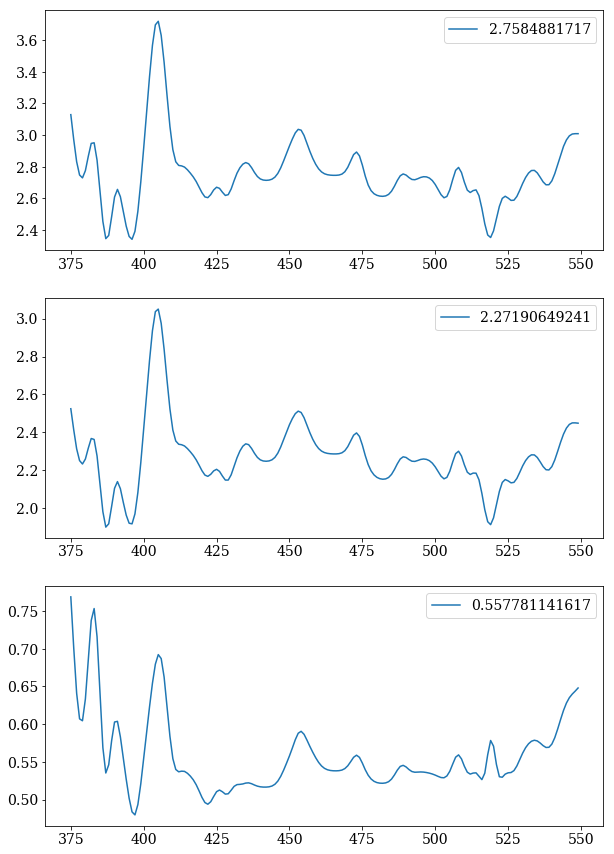

In [49]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize = (10,15))
ZM = []
DM = []
DV = []
ii = []
for i in range(375,550):
    ii.append(i)
    cont = np.load('/Volumes/PFagrelius_Backup/sky_data/wave_arrays/blue_data_vector_%d.npy' % i)
    zen_cont = cont[b_zen_dark]
    ok = np.isfinite(zen_cont)
    zen_cont = zen_cont[ok]
    dark_cont = cont[b_dark]
    ok = np.isfinite(dark_cont)
    dark_cont = dark_cont[ok]
    DM.append(np.mean(dark_cont))
    ZM.append(np.mean(zen_cont))
    DV.append(np.std(dark_cont))
ax1.plot(ii, DM, '-',label = np.mean(DM))
ax1.legend()
ax2.plot(ii, ZM, '-',label = np.mean(ZM))
ax3.plot(ii, DV, '-', label = np.mean(DV))
ax2.legend()
ax3.legend()

2.55235798264
2.11353264182


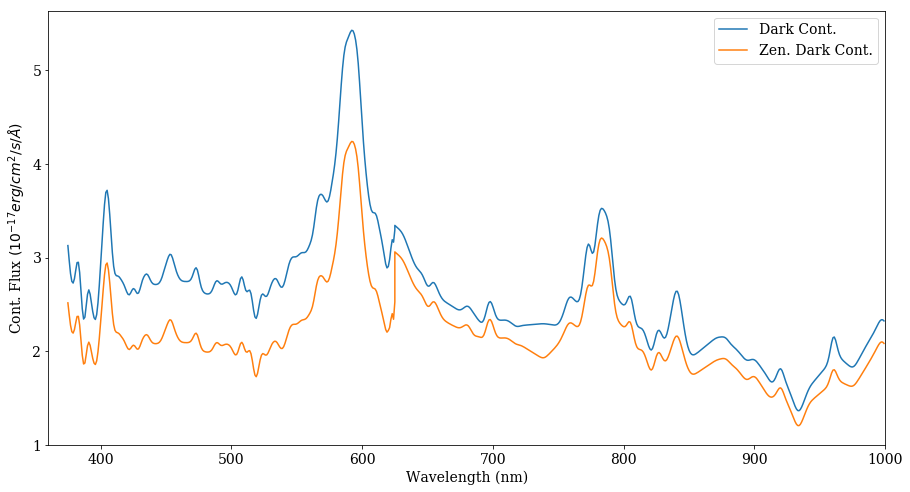

In [65]:
fig, (ax1) = plt.subplots(1,figsize = (15,8))
ZM = []
ZV = []
DM = []
DV = []
ii = []
for i in range(375,626):
    ii.append(i)
    cont = np.load('/Volumes/PFagrelius_Backup/sky_data/wave_arrays/blue_data_vector_%d.npy' % i)
    zen_cont = cont[b_zen_dark]
    ok = np.isfinite(zen_cont)
    zen_cont = zen_cont[ok]
    dark_cont = cont[b_dark]
    ok = np.isfinite(dark_cont)
    dark_cont = dark_cont[ok]
    DM.append(np.mean(dark_cont))
    ZM.append(np.mean(zen_cont))
    ZV.append(np.std(zen_cont))
    DV.append(np.std(dark_cont))
for i in range(625,1000):
    ii.append(i)
    cont = np.load('/Volumes/PFagrelius_Backup/sky_data/wave_arrays/red_data_vector_%d.npy' % i)
    zen_cont = cont[b_zen_dark]
    ok = np.isfinite(zen_cont)
    zen_cont = zen_cont[ok]
    dark_cont = cont[b_dark]
    ok = np.isfinite(dark_cont)
    dark_cont = dark_cont[ok]
    DM.append(np.mean(dark_cont))
    ZM.append(np.mean(zen_cont))
    ZV.append(np.std(zen_cont))
    DV.append(np.std(dark_cont))
ax1.plot(ii, DM, '-', label = 'Dark Cont.')
ax1.plot(ii, ZM, '-', label = "Zen. Dark Cont.")
# for i in [380, 410,425,460,480,510,540,565]:
#     ax1.plot(i, np.mean(BSMeta[b_dark]['cont_b_%d' % i ]),'x')
# for i in [642, 675, 710, 720, 740,825,833,873,920,977,1025 ]:
#     dark = RSMeta[r_dark]['cont_b_%d' % i ]
#     ok = np.isfinite(dark)
#     dark = dark[ok]
#     ax1.plot(i, np.mean(dark),'x')
ax1.legend()
#ax2.plot(ii, DV, '-', label = np.mean(DV))
ax1.set_xlabel("Wavelength (nm)")
ax1.set_ylabel("Cont. Flux $(10^{-17} erg/cm^{2}/s/\AA)$")
ax1.set_xlim(360,1000)
print(np.average(DM, weights = 1/np.array(DV)))
print(np.average(ZM, weights = 1/np.array(ZV)))
plt.savefig('/Users/parkerf/Research/Thesis/thesis_doc/images/cont_plots.png')

[2.1563971, 2.7406926, 2.9488561, 2.7915041, 2.6428785, 2.8263791, 2.5564649, 3.215971]


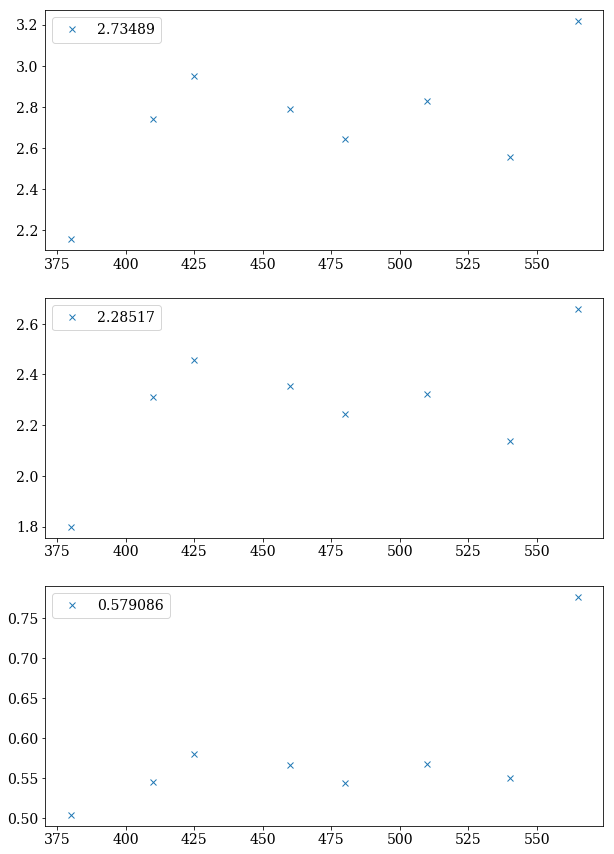

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize = (10,15))
ii = []
DM = []
ZM = []
DV = []
for i in [380, 410,425,460,480,510,540,565]:
    ii.append(i)
    DM.append(np.mean(BSMeta[b_dark]['cont_b_%d' % i ]))
    ZM.append(np.mean(BSMeta[b_zen_dark]['cont_b_%d' % i]))
    DV.append(np.std(BSMeta[b_dark]['cont_b_%d' % i]))
print(DM)
ax1.plot(ii, DM,'x',label = np.mean(DM))
ax2.plot(ii, ZM, 'x', label = np.mean(ZM))
ax3.plot(ii, DV, 'x', label = np.mean(DV))
ax1.legend()
ax2.legend()
ax3.legend()

[2.8273635, 2.1928475, 2.075799, 2.0001721, 2.7530074, 2.8997509, 1.8348547, 2.3442781, 1.6893953, 1.6732676, 2.0862098]


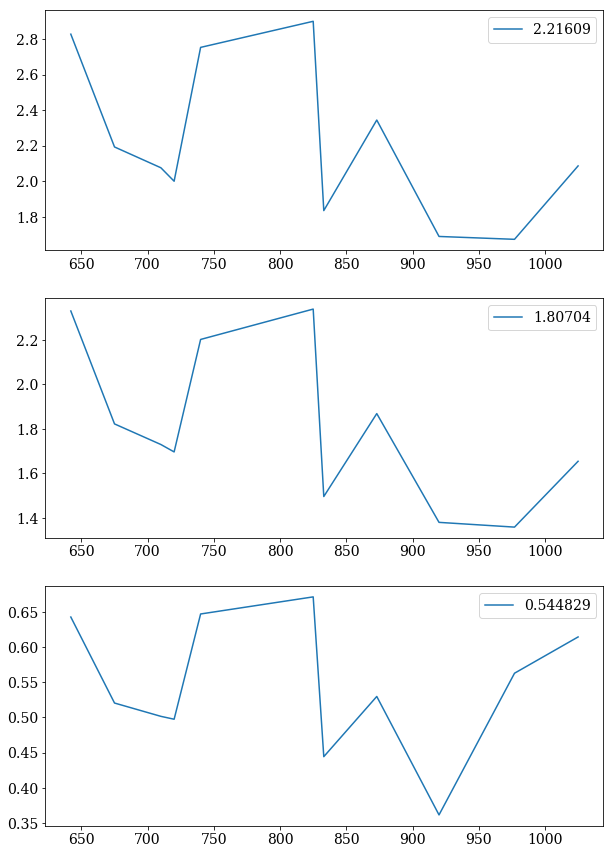

In [41]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize = (10,15))
ii = []
DM = []
ZM = []
DV = []
for i in [642, 675, 710, 720, 740,825,833,873,920,977,1025 ]:
    ii.append(i)
    dark = RSMeta[r_dark]['cont_b_%d' % i ]
    ok = np.isfinite(dark)
    dark = dark[ok]
    DM.append(np.mean(dark))
    ZM.append(np.mean(RSMeta[r_zen_dark]['cont_b_%d' % i]))
    DV.append(np.std(dark))
print(DM)
ax1.plot(ii, DM,'-',label = np.mean(DM))
ax2.plot(ii, ZM, '-', label = np.mean(ZM))
ax3.plot(ii, DV, '-', label = np.mean(DV))
ax1.legend()
ax2.legend()
ax3.legend()

In [6]:
my_cont  = np.load('/Volumes/PFagrelius_Backup/sky_data/wave_arrays/red_data_vector_820.npy')

In [12]:
zen_cont = my_cont[r_zen_dark]
dark_cont = my_cont[r_dark]

In [15]:
ok = np.isfinite(dark_cont)
dark_cont = dark_cont[ok]

0.497065327274
0.591869303979


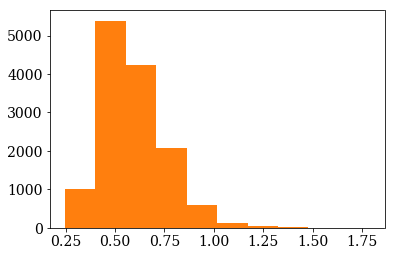

In [16]:
print(np.mean(zen_cont/np.pi))
ret = plt.hist(zen_cont/np.pi)
print(np.mean(dark_cont/np.pi))
ret = plt.hist(dark_cont/np.pi)

In [13]:
from scipy.interpolate import interp1d
solar_data = np.load('/Users/parkerf/Research/SkyModel/BOSS_Sky/SkyModel/ContModel/files/solar_flux.npy')
solar_flux = interp1d(solar_data['MJD'], solar_data['fluxobsflux'], bounds_error=False, fill_value = 0)

In [32]:
BDark = BSMeta[b_dark]

In [40]:
new_sf = solar_flux(BSMeta['MJD']-4.8)

(array([ 1811.,  2236.,  2273.,  1595.,  1706.,  1096.,   361.,    92.,
           34.,    20.]),
 array([  68.23253333,   82.99104471,   97.74955608,  112.50806745,
         127.26657882,  142.0250902 ,  156.78360157,  171.54211294,
         186.30062431,  201.05913569,  215.81764706]),
 <a list of 10 Patch objects>)

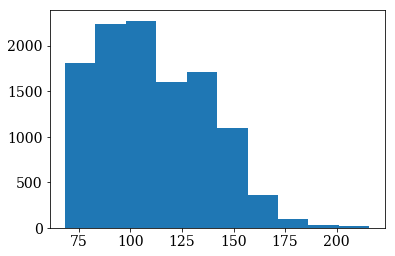

In [15]:
plt.hist(new_sf)

In [37]:
low_sf = np.where(new_sf<75)
high_sf = np.where(new_sf>200)
mean_sf = np.where((new_sf>105)&(new_sf<115))

(array([  490.,   955.,  1266.,  1578.,  1799.,  1596.,  1263.,  1018.,
          946.,   313.]),
 array([-20.14726258, -10.52849486,  -0.90972713,   8.70904059,
         18.32780832,  27.94657605,  37.56534377,  47.1841115 ,
         56.80287922,  66.42164695,  76.04041468]),
 <a list of 10 Patch objects>)

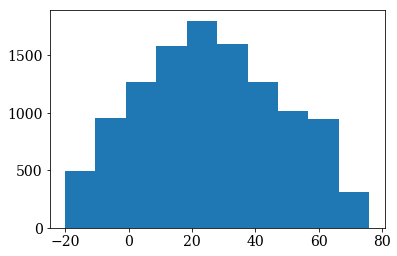

In [25]:
plt.hist(BDark['ECL_LAT'])

In [26]:
cont = np.load('/Volumes/PFagrelius_Backup/sky_data/wave_arrays/blue_data_vector_510.npy')

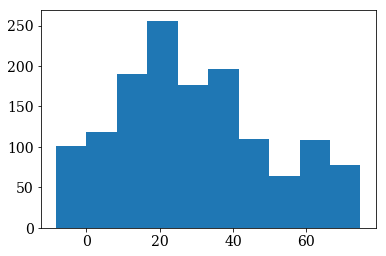

In [39]:
ret = plt.hist(BDark[mean_sf]['ECL_LAT'])

In [202]:


for i in [0,30,60]:
    this_meta = np.where((np.abs(BDark["ECL_LAT"])<i+1)&(np.abs(BDark["ECL_LAT"])>i-1))
    this_cont = dark_cont[this_meta]
    
    this_meta = np.where((BDark[this_meta]['SOLARFLUX']<85))
    this_cont = this_cont[this_meta]
    ok = np.isfinite(this_cont)
    this_cont = this_cont[ok]
    print(i, np.mean(this_cont))

0 2.7703825528
30 2.14316930903
60 2.06598128466


In [219]:
BDark = BSMeta[b_dark]
RDark = RSMeta[r_dark]
DM = {'low':{0:[],30:[],60:[]},'mean':{0:[],30:[],60:[]},'high':{0:[],30:[],60:[]}}
DV = {'low':{0:[],30:[],60:[]},'mean':{0:[],30:[],60:[]},'high':{0:[],30:[],60:[]}}

for i in range(450,500):
    cont = np.load('/Volumes/PFagrelius_Backup/sky_data/wave_arrays/blue_data_vector_%d.npy' % i)
    dark_cont = cont[b_dark]
    for x in [0,30,60]:

        this_meta = np.where((np.abs(BDark["ECL_LAT"])<x+1)&(np.abs(BDark["ECL_LAT"])>x-1))
        this_cont = dark_cont[this_meta]
        
        for t in ['low','mean','high']:
            if t == 'low':
                new_meta = np.where((BDark[this_meta]['SOLARFLUX']<85))
            elif t == 'mean':
                new_meta = np.where((BDark[this_meta]['SOLARFLUX']>105)&(BDark[this_meta]['SOLARFLUX']<115))
            elif t == 'high':
                new_meta = np.where((BDark[this_meta]['SOLARFLUX']>135))
            new_cont = this_cont[new_meta]
            ok = np.isfinite(new_cont)
            new_cont = new_cont[ok]
            DM[t][x].append(np.mean(new_cont))
            DV[t][x].append(np.std(new_cont))


In [220]:
for t in ['low','mean','high']:
    print('------------')
    print(t)
    for x in [0,30,60]:
        print(x, np.average(DM[t][x], weights = 1/np.array(DV[t][x])))

------------
low
0 2.76540064857
30 2.1968968347
60 2.17247771279
------------
mean
0 3.15874161403
30 2.71908304616
60 2.46203205302
------------
high
0 3.43662576955
30 3.09222435473
60 2.88771253961


In [221]:
RDark = RSMeta[r_dark]
DM = {'low':{0:[],30:[],60:[]},'mean':{0:[],30:[],60:[]},'high':{0:[],30:[],60:[]}}
DV = {'low':{0:[],30:[],60:[]},'mean':{0:[],30:[],60:[]},'high':{0:[],30:[],60:[]}}
for i in range(700,750):
    cont = np.load('/Volumes/PFagrelius_Backup/sky_data/wave_arrays/red_data_vector_%d.npy' % i)
    dark_cont = cont[r_dark]
    for x in [0,30,60]:

        this_meta = np.where((np.abs(RDark["ECL_LAT"])<x+1)&(np.abs(RDark["ECL_LAT"])>x-1))
        this_cont = dark_cont[this_meta]
        
        for t in ['low','mean','high']:
            if t == 'low':
                new_meta = np.where((RDark[this_meta]['SOLARFLUX']<85))
            elif t == 'mean':
                new_meta = np.where((RDark[this_meta]['SOLARFLUX']>105)&(RDark[this_meta]['SOLARFLUX']<115))
            elif t == 'high':
                new_meta = np.where((RDark[this_meta]['SOLARFLUX']>135))
            new_cont = this_cont[new_meta]
            ok = np.isfinite(new_cont)
            new_cont = new_cont[ok]
            DM[t][x].append(np.mean(new_cont))
            DV[t][x].append(np.std(new_cont))

#print(np.average(DM, weights = 1/np.array(DV)))


In [222]:
for t in ['low','mean','high']:
    print('------------')
    print(t)
    for x in [0,30,60]:
        print(x, np.average(DM[t][x], weights = 1/np.array(DV[t][x])))

------------
low
0 1.91328299172
30 1.57171781342
60 1.5707964516
------------
mean
0 2.2263472648
30 2.08103413539
60 1.66220424314
------------
high
0 2.54659958265
30 2.10137587699
60 1.97775907908


In [223]:
RDark = RSMeta[r_dark]
DM = {'low':{0:[],30:[],60:[]},'mean':{0:[],30:[],60:[]},'high':{0:[],30:[],60:[]}}
DV = {'low':{0:[],30:[],60:[]},'mean':{0:[],30:[],60:[]},'high':{0:[],30:[],60:[]}}
for i in range(950,1000):
    cont = np.load('/Volumes/PFagrelius_Backup/sky_data/wave_arrays/red_data_vector_%d.npy' % i)
    dark_cont = cont[r_dark]
    for x in [0,30,60]:

        this_meta = np.where((np.abs(RDark["ECL_LAT"])<x+1)&(np.abs(RDark["ECL_LAT"])>x-1))
        this_cont = dark_cont[this_meta]
        
        for t in ['low','mean','high']:
            if t == 'low':
                new_meta = np.where((RDark[this_meta]['SOLARFLUX']<85))
            elif t == 'mean':
                new_meta = np.where((RDark[this_meta]['SOLARFLUX']>105)&(RDark[this_meta]['SOLARFLUX']<115))
            elif t == 'high':
                new_meta = np.where((RDark[this_meta]['SOLARFLUX']>135))
            new_cont = this_cont[new_meta]
            ok = np.isfinite(new_cont)
            new_cont = new_cont[ok]
            DM[t][x].append(np.mean(new_cont))
            DV[t][x].append(np.std(new_cont))

#print(np.average(DM, weights = 1/np.array(DV)))


In [224]:
for t in ['low','mean','high']:
    print('------------')
    print(t)
    for x in [0,30,60]:
        print(x, np.average(DM[t][x], weights = 1/np.array(DV[t][x])))

------------
low
0 1.6781718546
30 1.57517587847
60 1.91668114031
------------
mean
0 2.01758028114
30 1.94909051622
60 1.82757625468
------------
high
0 2.24949113393
30 1.8993895761
60 1.84596143976


In [195]:
for i in range(625,1000):
    ii.append(i)
    cont = np.load('/Volumes/PFagrelius_Backup/sky_data/wave_arrays/red_data_vector_%d.npy' % i)
    zen_cont = cont[b_zen_dark]
    ok = np.isfinite(zen_cont)
    zen_cont = zen_cont[ok]
    dark_cont = cont[b_dark]
    ok = np.isfinite(dark_cont)
    dark_cont = dark_cont[ok]
    DM.append(np.mean(dark_cont))
    ZM.append(np.mean(zen_cont))
    ZV.append(np.std(zen_cont))
    DV.append(np.std(dark_cont))
ax1.plot(ii, DM, '-', label = 'Dark Cont.')
ax1.plot(ii, ZM, '-', label = "Zen. Dark Cont.")
# for i in [380, 410,425,460,480,510,540,565]:
#     ax1.plot(i, np.mean(BSMeta[b_dark]['cont_b_%d' % i ]),'x')
# for i in [642, 675, 710, 720, 740,825,833,873,920,977,1025 ]:
#     dark = RSMeta[r_dark]['cont_b_%d' % i ]
#     ok = np.isfinite(dark)
#     dark = dark[ok]
#     ax1.plot(i, np.mean(dark),'x')

(array([ 42.,  34.,   0.,   0.,  26.,  24.,  18.,   2.,   8.,  40.]),
 array([  79.75642395,   85.58112946,   91.40583496,   97.23054047,
         103.05524597,  108.87995148,  114.70465698,  120.52936249,
         126.35406799,  132.1787735 ,  138.003479  ]),
 <a list of 10 Patch objects>)

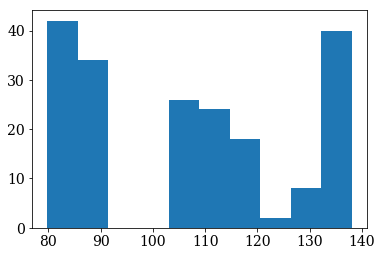

In [187]:
plt.hist(BDark[this_meta]['SOLARFLUX'])

In [199]:
len(this_meta[0])

100

In [197]:
np.mean(this_cont)

2.7508980446136069